# Documnetation

    * RAG_testing -> Create Barbie and Oppenheimer Dataset 



    * Demo.ipynb ->
    * FIX BLEU ROUGE ->


# Research Questions 

* Expore Q&A capabilities of Different LLMs

* NLP metrics performance on LLMs

* Better ways of testing -> semantic search, BERTScore, relevancy and factuality 

* Improve performance on RAG????(contentious )

# Project breakdown is in such manner: 

## Part1: Create and store questions.

In [2]:
import ragas 
import pandas as pd 
import numpy as np 

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# Creating dataframes for Battle of Hastings, Battle of Waterloo, and Battle of Boyne Summary-based questions
hastings_questions = {
    "Question": [
        "What year did the Battle of Hastings take place?",
        "Who was the Norman leader at the Battle of Hastings?",
        "What significant English figure died in the Battle of Hastings?",
        "What was the decisive tactic used by the Normans to win the Battle of Hastings?",
        "Where did the Battle of Hastings take place?"
    ],
    "Reference Answer": [
        "The Battle of Hastings took place in 1066.",
        "William the Conqueror led the Normans at the Battle of Hastings.",
        "King Harold II of England died in the Battle of Hastings.",
        "The Normans used a feigned retreat tactic to break the English shield wall, leading to their victory.",
        "The Battle of Hastings took place near the town of Hastings, England."
    ],
}

waterloo_questions = {
    "Question": [
        "In what year did the Battle of Waterloo occur?",
        "Which military leader was defeated at the Battle of Waterloo?",
        "Which two armies allied against Napoleon at Waterloo?",
        "What was the outcome of the Battle of Waterloo for Napoleon?",
        "What geographical feature played a crucial role in the Battle of Waterloo?"
    ],
    "Reference Answer": [
        "The Battle of Waterloo occurred in 1815.",
        "Napoleon Bonaparte was defeated at the Battle of Waterloo.",
        "The British led by the Duke of Wellington and the Prussians led by Gebhard Leberecht von Blücher allied against Napoleon at Waterloo.",
        "The outcome of the Battle of Waterloo for Napoleon was his final defeat, leading to his abdication and exile to Saint Helena.",
        "The ridge of Mont-Saint-Jean played a crucial role in the battle, providing a defensive position for the Duke of Wellington's army."
    ],
}

boyne_questions = {
    "Question": [
        "What year did the Battle of Boyne take place?",
        "Who were the two rival kings at the Battle of Boyne?",
        "What river is the Battle of Boyne named after?",
        "What was the outcome of the Battle of Boyne for James II?",
        "What broader conflict was the Battle of Boyne part of?"
    ],
    "Reference Answer": [
        "The Battle of Boyne took place in 1690.",
        "The rival kings were William III of England and James II of England.",
        "The Battle of Boyne is named after the River Boyne.",
        "The outcome was the defeat of James II, solidifying William III's hold on the English throne.",
        "The Battle of Boyne was part of the larger Williamite War in Ireland."
    ],
}

# Convert to pandas DataFrame
df_hastings = pd.DataFrame(hastings_questions)
df_waterloo = pd.DataFrame(waterloo_questions)
df_boyne = pd.DataFrame(boyne_questions)

# Save to CSV
hastings_file_path = 'SummaryHastings.csv'
waterloo_file_path = 'SummaryWaterloo.csv'
boyne_file_path = 'SummaryBoyne.csv'
df_hastings.to_csv(hastings_file_path, index=False)
df_waterloo.to_csv(waterloo_file_path, index=False)
df_boyne.to_csv(boyne_file_path, index=False)



In [15]:
barbie_summarization_questions = {
    "Question": [
        "Summarize the main plot of the Barbie movie focusing on Barbie Margot's journey.",
        "Provide a summary of Ken's character development throughout the movie.",
        "Describe the conflict and resolution encountered by Barbie Margot in the movie.",
        "Summarize the role of the Mattel executives in the movie.",
        "Provide a summary of the climax of the Barbie movie.",
        "Summarize Barbie's influence on the other characters in the movie.",
        "Describe the transformation of Barbie Land throughout the movie.",
        "Provide a summary of the film's resolution and its message about individuality.",
        "Summarize the role of humor and satire in the Barbie movie.",
        "Describe how the movie addresses themes of empowerment and self-discovery."
    ],
    "Reference Answer": [
        "In the Barbie movie, Barbie Margot experiences a series of challenges and transformations as she navigates her way through the whimsical yet tumultuous world of Barbie Land and the real world. Her journey is marked by self-discovery, conflicts, and reconciliations with friends and foes alike, ultimately leading to her realization of personal independence and empowerment. The narrative highlights themes of identity, friendship, and the impact of societal expectations on individual aspirations.",
        "Throughout the Barbie movie, Ken undergoes significant character development, starting as a superficial and somewhat egotistical character who gradually learns the value of genuine relationships and self-reflection. His journey involves various comedic and heartfelt moments that lead to a more rounded understanding of his role not only as Barbie's counterpart but as an individual with his own dreams and vulnerabilities.",
        "Barbie Margot faces a major conflict when she realizes that the Barbie Land she knows is under threat by external and internal forces pushing for a homogeneous and unrealistic world. The resolution comes as she champions diversity and authenticity among her friends, rallying them to embrace their unique traits. This leads to a revitalized Barbie Land where individuality and freedom are celebrated.",
        "The Mattel executives in the Barbie movie play the antagonistic role of corporate overseers who attempt to commercialize and sanitize Barbie Land to maintain brand image, often at the expense of creativity and personal expression. Their involvement peaks during key plot points where their decisions directly impact the main characters, leading to climactic confrontations and ultimately, their change in strategy following Barbie's stand against their policies.",
        "The climax of the Barbie movie occurs when Barbie Margot and her friends confront the Mattel executives at a grand event designed to showcase the new, restrictive policies of Barbie Land. In a dramatic and colorful showdown, they demonstrate the value of diversity and creativity, which convinces everyone, including the executives, to embrace a more inclusive and less commercialized vision of Barbie Land.",
        "In the movie, Barbie serves as a catalyst for change among other characters. Through her infectious optimism and insistence on self-expression, she influences others around her to challenge their own limitations and societal expectations. Her interactions lead many characters, including Ken, to reflect on their own identities and aspirations, fostering growth and acceptance.",
        "Barbie Land undergoes significant transformation from a perfectly controlled utopia to a more chaotic but authentic space that reflects the diverse personalities and dreams of its inhabitants. This change is driven by Barbie's quest to introduce more freedom and creativity, culminating in a vibrant community that values individuality over conformity.",
        "The resolution of the Barbie movie underscores a powerful message about the importance of individuality and self-acceptance. As Barbie and her friends embrace their unique traits and stand up against external pressures to conform, they revitalize Barbie Land as a place where everyone is encouraged to be their true self. This culminates in a celebration of diversity, impacting viewers with a call to reject societal constraints.",
        "Humor and satire are pivotal in the Barbie movie, used effectively to critique societal norms about beauty and gender roles. Through witty dialogue, comedic situations, and satirical portrayals of consumer culture, the film delivers its themes in an engaging manner, encouraging audiences to laugh while reflecting on serious social issues.",
        "The movie tackles empowerment and self-discovery by following Barbie as she navigates challenges that test her beliefs and identity. Each obstacle and interaction provides her with insights into her own strength and the restrictive nature of societal expectations, leading her toward a profound journey of self-discovery and empowerment that resonates with the audience."
    ],
}


oppenheimer_summarization_questions = {
    "Question": [
        "Summarize the scientific contributions of J. Robert Oppenheimer as depicted in the movie.",
        "Describe the ethical dilemmas faced by Oppenheimer in the movie.",
        "Provide a summary of the personal and professional conflicts experienced by Oppenheimer.",
        "Summarize the portrayal of the security hearings against Oppenheimer.",
        "Describe the impact of Oppenheimer's work on the post-war world as shown in the movie.",
        "Summarize the depiction of Oppenheimer's personal relationships in the movie.",
        "Provide a summary of how the movie portrays the ethical implications of scientific discovery.",
        "Describe the narrative techniques used to explore Oppenheimer's psyche.",
        "Summarize the political and historical context surrounding Oppenheimer's work as shown in the movie.",
        "Provide a summary of the film's portrayal of the impact of the atomic bomb on global politics."
    ],
    "Reference Answer": [
        "In the Oppenheimer movie, J. Robert Oppenheimer's contributions to science, particularly his leadership in developing the atomic bomb during the Manhattan Project, are depicted with a focus on his brilliant theoretical insights and his ability to bring together diverse scientific minds. His pivotal role in the Los Alamos laboratory and his strategic decisions that led to the successful creation and testing of the bomb are highlighted, alongside his complex emotional responses to the weapon's devastating power.",
        "The movie explores Oppenheimer's ethical dilemmas, particularly his internal conflict over the moral implications of creating a weapon of mass destruction. These dilemmas intensify with the bombings of Hiroshima and Nagasaki, driving Oppenheimer to advocate for nuclear disarmament and regulation. His struggles with guilt, responsibility, and his role in shaping future nuclear policies are central themes.",
        "Oppenheimer's journey in the movie is marked by a series of personal and professional conflicts, from his confrontations with military and governmental authorities over the control and use of nuclear weapons to his complex relationships with colleagues and family. These conflicts culminate in his security hearing, which challenges his loyalty and integrity, profoundly affecting his career and personal life.",
        "The security hearings against Oppenheimer are portrayed as a tense and dramatic ordeal that questions his associations, political leanings, and the implications of his scientific work. The hearings serve as a critical point in the movie, reflecting the broader political and social anxieties of the Cold War era, and ultimately lead to his public and professional marginalization despite his crucial contributions to science.",
        "The movie depicts Oppenheimer's work as having a profound impact on the post-war world, both through the immediate effects of nuclear warfare and the long-term implications for global politics and security. His advocacy for nuclear disarmament and a thoughtful approach to scientific research influences subsequent debates and policies regarding nuclear weapons, highlighting his complex legacy as both a 'father' of the atomic bomb and a proponent of peace.",
        "The movie portrays Oppenheimer's personal relationships as complex and integral to his character development. His interactions with family, friends, and colleagues highlight a man torn between his professional obligations and personal convictions, with significant relationships providing both support and conflict, deeply influencing his personal and professional decisions.",
        "The film explores the ethical implications of scientific discovery through Oppenheimer's internal conflicts and the broader societal reactions to the atomic bomb. It delves into the moral responsibilities of scientists, the consequences of their discoveries, and the often-painful reconciliation between scientific advancement and its potential for destruction.",
        "The movie employs a mix of flashbacks, monologues, and intimate dialogues to delve into Oppenheimer's psyche. These narrative techniques reveal his thoughts and emotions, providing a deep introspection into his motivations, fears, and moral dilemmas, and effectively humanizing a figure often overshadowed by his monumental scientific achievements.",
        "The movie sets Oppenheimer's work against a backdrop of intense political and historical upheaval, including the Cold War tensions and the race for nuclear supremacy. It illustrates how these larger forces shaped the direction of his work and the ethical dilemmas it engendered, contextualizing his contributions within the broader geopolitical narratives of the time.",
        "The film portrays the atomic bomb's impact on global politics as transformative and fraught with tension. Through Oppenheimer's story, it shows how the bomb's creation shifted power dynamics, instigated arms races, and sparked international debates about nuclear ethics and governance, ultimately reshaping the course of global relations in the 20th century."
    ],
}

# Convert to pandas DataFrame
df_barbie = pd.DataFrame(barbie_summarization_questions)
df_oppenheimer = pd.DataFrame(oppenheimer_summarization_questions)

# Save to CSV
barbie_file_path = 'SummarisationBarbieQA.csv'
oppenheimer_file_path = 'SummarisationOppenheimerQA.csv'
df_barbie.to_csv(barbie_file_path, index=False)
df_oppenheimer.to_csv(oppenheimer_file_path, index=False)

In [ ]:
#Making RAG for Battles

In [28]:
'''
Creating a RAG for the movies 
# Oppenheimer 
'''
import time 
import os.path 
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader,StorageContext, load_index_from_storage ,Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

Persist_DIR = "./storageHastings"

if not os.path.exists(Persist_DIR):
    print("I'm starting over")
    documents = SimpleDirectoryReader("Data/Hastings").load_data()

    start_time = time.time()
    # bge-m3 embedding model
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")

    # ollama/mistral 
    Settings.llm = Ollama(model="mistral", request_timeout=30.0)


    index = VectorStoreIndex.from_documents(documents)

    index.storage_context.persist(persist_dir=Persist_DIR)
    print("Created Storage for Hastings")

else:
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)

    # bge-m3 embedding model
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")

    # ollama/mistral 
    Settings.llm = Ollama(model="llama2", request_timeout=30.0)

    print("Okay so Local Model loaded for the Hastings")

    start_time = time.time()
    index = load_index_from_storage(storage_context)    

query_engine = index.as_query_engine()
response = query_engine.query("Who won the battle of Hastings?")
print(response)
end_time = time.time()
print(f"Time taken to print = {end_time - start_time} seconds")

I'm starting over
Created Storage for Hastings
 William, Duke of Normandy, emerged as the victor in the Battle of Hastings against King Harold Godwinson of England. This decisive Norman victory marked the beginning of the Norman Conquest of England.
Time taken to print = 13.458332777023315 seconds


In [29]:
'''
Creating a RAG for the movies 
# Oppenheimer 
'''
import time 
import os.path 
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader,StorageContext, load_index_from_storage ,Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

Persist_DIR = "./storageBoyne"

if not os.path.exists(Persist_DIR):
    print("I'm starting over")
    documents = SimpleDirectoryReader("Data/Boyne").load_data()

    start_time = time.time()
    # bge-m3 embedding model
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")

    # ollama/mistral 
    Settings.llm = Ollama(model="mistral", request_timeout=30.0)


    index = VectorStoreIndex.from_documents(documents)

    index.storage_context.persist(persist_dir=Persist_DIR)
    print("Created Storage for Boyne")

else:
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)

    # bge-m3 embedding model
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")

    # ollama/mistral 
    Settings.llm = Ollama(model="llama2", request_timeout=30.0)

    print("Okay so Local Model loaded for the Boyne")

    start_time = time.time()
    index = load_index_from_storage(storage_context)    

query_engine = index.as_query_engine()
response = query_engine.query("Who won the battle of Boyne?")
print(response)
end_time = time.time()
print(f"Time taken to print = {end_time - start_time} seconds")

I'm starting over
Created Storage for Boyne
 The Battle of the Boyne was won by William III and the Grand Alliance forces.
Time taken to print = 11.910674333572388 seconds


In [30]:
'''
Creating a RAG for the movies 
# Oppenheimer 
'''
import time 
import os.path 
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader,StorageContext, load_index_from_storage ,Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

Persist_DIR = "./storageWaterloo"

if not os.path.exists(Persist_DIR):
    print("I'm starting over")
    documents = SimpleDirectoryReader("Data/Waterloo").load_data()

    start_time = time.time()
    # bge-m3 embedding model
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")

    # ollama/mistral 
    Settings.llm = Ollama(model="mistral", request_timeout=30.0)


    index = VectorStoreIndex.from_documents(documents)

    index.storage_context.persist(persist_dir=Persist_DIR)
    print("Created Storage for Waterloo")

else:
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)

    # bge-m3 embedding model
    Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")

    # ollama/mistral 
    Settings.llm = Ollama(model="llama2", request_timeout=30.0)

    print("Okay so Local Model loaded for the Waterloo")

    start_time = time.time()
    index = load_index_from_storage(storage_context)    

query_engine = index.as_query_engine()
response = query_engine.query("Who won the battle of Waterloo?")
print(response)
end_time = time.time()
print(f"Time taken to print = {end_time - start_time} seconds")

I'm starting over
Created Storage for Waterloo
 The Prussians and the Anglo-allied forces under the command of Field Marshal Blücher and the Duke of Wellington respectively emerged victorious in the Battle of Waterloo on 18 June 1815. The decisive engagement marked the end of the Napoleonic Wars and Napoleon's second and definitive abdication as Emperor of the French.
Time taken to print = 16.659861087799072 seconds


# Summary Tasks

In [70]:
SummaryBarbieQA = pd.read_csv("SummarisationBarbieQA.csv")
SummaryOppenheimerQA = pd.read_csv("SummarisationOppenheimerQA.csv")


In [3]:
SummariseBarbie = pd.read_csv("SummarisationBarbieQA.csv")
SummariseOppenheimer = pd.read_csv("SummarisationOppenheimerQA.csv")


In [ ]:
import pandas as pd
import os
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Set up for multiple datasets
datasets = {
    'SummariseBarbie': 'SummarisationBarbieQA.csv',
    'SummariseOppenheimer': 'SummarisationOppenheimerQA.csv'
}

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model="llama2", request_timeout=50.0)

results = {}

# Processing each dataset
for dataset_name, file_path in datasets.items():
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Check if the persistent storage directory exists; if not, initialize and load documents
    Persist_DIR = f"./storage{dataset_name}"
    if not os.path.exists(Persist_DIR):
        print(f"Initializing storage and loading documents for {dataset_name}.")
        documents = SimpleDirectoryReader("Data/" + dataset_name).load_data()
        index = VectorStoreIndex.from_documents(documents)
        index.storage_context.persist(persist_dir=Persist_DIR)
    else:
        print(f"Loading existing storage for {dataset_name}.")
        storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
        index = load_index_from_storage(storage_context)
    
    # Convert the index into a query engine for the LLM
    query_engine = index.as_query_engine()

    # Lists to store results
    responses_BERT = []
    BERT_P_scores = []
    BERT_R_scores = []
    BERT_F1_scores = []

    # Processing each question in the dataset
    for i in range(len(df)):
        question = df['Question'][i]
        
        # Use the query engine to generate a response based on the indexed documents
        response = query_engine.query(question)
        response_text = response.response
        
        # Store the response text
        responses_BERT.append(response_text)
        
        # Calculate BERTscore
        P, R, F1 = score([response_text], [df['Reference Answer'][i]], lang="en", verbose=True, model_type="distilbert-base-uncased")
        
        # Store scores
        BERT_P_scores.append(P[0].item())
        BERT_R_scores.append(R[0].item())
        BERT_F1_scores.append(F1[0].item())

    # Create a DataFrame from the stored results
    results[dataset_name] = pd.DataFrame({
        'Question': df['Question'],
        'Reference Answer': df['Reference Answer'],
        'LLM Response': responses_BERT,
        'Precision': BERT_P_scores,
        'Recall': BERT_R_scores,
        'F1 Score': BERT_F1_scores
    })

# Optionally, save results to files or handle them as needed
# For example: results['SummaryBarbieQA'].to_csv('Results_SummaryBarbieQA.csv', index=False)


In [21]:
import pandas as pd
import os
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Define paths to datasets
datasets = {
    'storageBarbie': 'SummaryBarbieQA.csv',
    'storageOppenheimer': 'SummaryOppenheimerQA.csv',
    # 'SummaryWaterloo': 'SummaryWaterloo.csv',
    # 'SummaryHastings': 'SummaryHastings.csv',
    # 'SummaryBoyne': 'SummaryBoyne.csv'
}

# Define the model
model_name = "llama2"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model=model_name, request_timeout=50.0)

# Results dictionary to store DataFrames for each dataset
results = {}

# Processing each dataset
for dataset_name, file_path in datasets.items():
    df = pd.read_csv(file_path)
    
    Persist_DIR = f"{dataset_name}"
    if not os.path.exists(Persist_DIR):
        os.makedirs(Persist_DIR)
        print(f"Initializing storage and loading documents for {dataset_name}.")
        # Assuming documents are loaded or created here if not exist
    print(f"Loading existing storage for {dataset_name}.")

    # Placeholder for setting up the indexing and querying, adjust as needed
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)
    query_engine = index.as_query_engine()

    # Lists to store results
    responses = []
    P_scores = []
    R_scores = []
    F1_scores = []

    # Process each question
    for i in range(len(df)):
        question = df['Question'][i]
        reference_answer = df['Reference Answer'][i]

        # Generate response using the query engine
        response = query_engine.query(question)
        response_text = response.response
        responses.append(response_text)

        # Calculate BERTScore
        P, R, F1 = score([response_text], [reference_answer], lang="en", verbose=True, model_type="distilbert-base-uncased")
        P_scores.append(P[0].item())
        R_scores.append(R[0].item())
        F1_scores.append(F1[0].item())

    # Store results in the dictionary with custom variable names
    results[f'{dataset_name}_{model_name}_responses_BERT'] = responses
    results[f'{dataset_name}_{model_name}_BERT_P_scores'] = P_scores
    results[f'{dataset_name}_{model_name}_BERT_R_scores'] = R_scores
    results[f'{dataset_name}_{model_name}_BERT_F1_scores'] = F1_scores

    # Optional: Create a DataFrame for each dataset's results and save or print
    df_results = pd.DataFrame({
        'Question': df['Question'],
        'Reference Answer': df['Reference Answer'],
        'LLM Response': responses,
        'Precision': P_scores,
        'Recall': R_scores,
        'F1 Score': F1_scores
    })
    results[f'{dataset_name}_{model_name}_DataFrame'] = df_results

# At this point, `results` dictionary contains all the variables with custom names, ready for further processing or output.


Loading existing storage for storageBarbie.
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 42.03it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 835.35it/s]

done in 0.03 seconds, 37.04 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 18.88it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 738.56it/s]

done in 0.06 seconds, 17.61 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 38.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 870.19it/s]

done in 0.03 seconds, 33.79 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 16.45it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 446.20it/s]

done in 0.07 seconds, 15.15 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 27.08it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 900.07it/s]

done in 0.04 seconds, 24.34 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 35.91it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 864.80it/s]

done in 0.03 seconds, 32.19 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 38.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1096.26it/s]

done in 0.03 seconds, 34.40 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 33.74it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 134.70it/s]

done in 0.04 seconds, 25.39 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 25.13it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 831.38it/s]

done in 0.05 seconds, 21.06 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 755.19it/s]

done in 0.11 seconds, 9.41 sentences/sec
Loading existing storage for storageOppenheimer.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 36.37it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 810.81it/s]

done in 0.03 seconds, 32.20 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 25.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 918.19it/s]

done in 0.04 seconds, 23.57 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.81it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 469.63it/s]

done in 0.08 seconds, 12.13 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 34.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 523.57it/s]

done in 0.03 seconds, 29.84 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 788.55it/s]

done in 0.07 seconds, 14.31 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 27.36it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 570.89it/s]

done in 0.04 seconds, 23.89 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 42.04it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 1057.03it/s]

done in 0.03 seconds, 37.58 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 16.72it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 602.11it/s]

done in 0.06 seconds, 15.50 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 34.78it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 149.21it/s]

done in 0.04 seconds, 23.31 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 35.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 711.14it/s]

done in 0.03 seconds, 31.14 sentences/sec


In [31]:
SummaryTest1_llama = results


# RAG

In [5]:
import pandas as pd
import os
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Define paths to datasets
datasets = {
    'storageBarbie': 'SummarisationBarbieQA.csv',
    'storageOppenheimer': 'SummarisationOppenheimerQA.csv'
}

# Define the model
model_name = "llama2"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model=model_name, request_timeout=50.0)

# Results dictionary to store DataFrames for each dataset
results = {}

# Processing each dataset
for dataset_name, file_path in datasets.items():
    df = pd.read_csv(file_path)
    
    Persist_DIR = f"{dataset_name}"
    if not os.path.exists(Persist_DIR):
        os.makedirs(Persist_DIR)
        print(f"Initializing storage and loading documents for {dataset_name}.")
        # Assuming documents are loaded or created here if not exist
    print(f"Loading existing storage for {dataset_name}.")

    # Placeholder for setting up the indexing and querying, adjust as needed
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)
    query_engine = index.as_query_engine()

    # Lists to store results
    responses = []
    P_scores = []
    R_scores = []
    F1_scores = []

    # Process each question
    for i in range(len(df)):
        question = df['Question'][i]
        reference_answer = df['Reference Answer'][i]

        # Generate response using the query engine
        response = query_engine.query(question)
        response_text = response.response
        responses.append(response_text)

        # Calculate BERTScore
        P, R, F1 = score([response_text], [reference_answer], lang="en", verbose=True, model_type="distilbert-base-uncased")
        P_scores.append(P[0].item())
        R_scores.append(R[0].item())
        F1_scores.append(F1[0].item())

    # Store results in the dictionary with custom variable names
    results[f'{dataset_name}_{model_name}_responses_BERT'] = responses
    results[f'{dataset_name}_{model_name}_BERT_P_scores'] = P_scores
    results[f'{dataset_name}_{model_name}_BERT_R_scores'] = R_scores
    results[f'{dataset_name}_{model_name}_BERT_F1_scores'] = F1_scores

    # Optional: Create a DataFrame for each dataset's results and save or print
    df_results = pd.DataFrame({
        'Question': df['Question'],
        'Reference Answer': df['Reference Answer'],
        'LLM Response': responses,
        'Precision': P_scores,
        'Recall': R_scores,
        'F1 Score': F1_scores
    })
    results[f'{dataset_name}_{model_name}_DataFrame'] = df_results

# At this point, `results` dictionary contains all the variables with custom names, ready for further processing or output.


Loading existing storage for storageBarbie.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 122.41it/s]

done in 0.10 seconds, 9.58 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.52it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 386.22it/s]

done in 0.09 seconds, 10.82 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 753.56it/s]

done in 0.08 seconds, 11.89 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 18.46it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 744.99it/s]

done in 0.06 seconds, 17.06 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.56it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 687.70it/s]

done in 0.08 seconds, 12.91 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 441.51it/s]

done in 0.17 seconds, 5.99 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 638.21it/s]

done in 0.14 seconds, 7.40 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.50it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 561.49it/s]

done in 0.08 seconds, 11.97 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 674.76it/s]

done in 0.14 seconds, 7.16 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 651.09it/s]

done in 0.13 seconds, 7.65 sentences/sec
Loading existing storage for storageOppenheimer.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 660.00it/s]

done in 0.10 seconds, 9.72 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 571.74it/s]

done in 0.16 seconds, 6.06 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.49it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 765.66it/s]

done in 0.08 seconds, 12.87 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 810.18it/s]

done in 0.08 seconds, 13.20 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 571.74it/s]

done in 0.16 seconds, 6.24 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 14.51it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 523.83it/s]

done in 0.07 seconds, 13.56 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 545.57it/s]

done in 0.10 seconds, 10.09 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 606.03it/s]

done in 0.17 seconds, 5.90 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 567.18it/s]

done in 0.11 seconds, 8.78 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 815.54it/s]

done in 0.07 seconds, 14.01 sentences/sec


In [6]:
RAG_SummaryTestLlama_all = results

In [7]:
import pandas as pd
import os
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama

# Define paths to datasets
datasets = {
    'storageBarbie': 'SummarisationBarbieQA.csv',
    'storageOppenheimer': 'SummarisationOppenheimerQA.csv'
}

# Define the model
model_name = "mistral"

# Initialize settings for embeddings and LLM model
Settings.embed_model = resolve_embed_model("local:BAAI/bge-small-en-v1.5")
Settings.llm = Ollama(model=model_name, request_timeout=50.0)

# Results dictionary to store DataFrames for each dataset
results = {}

# Processing each dataset
for dataset_name, file_path in datasets.items():
    df = pd.read_csv(file_path)
    
    Persist_DIR = f"{dataset_name}"
    if not os.path.exists(Persist_DIR):
        os.makedirs(Persist_DIR)
        print(f"Initializing storage and loading documents for {dataset_name}.")
        # Assuming documents are loaded or created here if not exist
    print(f"Loading existing storage for {dataset_name}.")

    # Placeholder for setting up the indexing and querying, adjust as needed
    storage_context = StorageContext.from_defaults(persist_dir=Persist_DIR)
    index = load_index_from_storage(storage_context)
    query_engine = index.as_query_engine()

    # Lists to store results
    responses = []
    P_scores = []
    R_scores = []
    F1_scores = []

    # Process each question
    for i in range(len(df)):
        question = df['Question'][i]
        reference_answer = df['Reference Answer'][i]

        # Generate response using the query engine
        response = query_engine.query(question)
        response_text = response.response
        responses.append(response_text)

        # Calculate BERTScore
        P, R, F1 = score([response_text], [reference_answer], lang="en", verbose=True, model_type="distilbert-base-uncased")
        P_scores.append(P[0].item())
        R_scores.append(R[0].item())
        F1_scores.append(F1[0].item())

    # Store results in the dictionary with custom variable names
    results[f'{dataset_name}_{model_name}_responses_BERT'] = responses
    results[f'{dataset_name}_{model_name}_BERT_P_scores'] = P_scores
    results[f'{dataset_name}_{model_name}_BERT_R_scores'] = R_scores
    results[f'{dataset_name}_{model_name}_BERT_F1_scores'] = F1_scores

    # Optional: Create a DataFrame for each dataset's results and save or print
    df_results = pd.DataFrame({
        'Question': df['Question'],
        'Reference Answer': df['Reference Answer'],
        'LLM Response': responses,
        'Precision': P_scores,
        'Recall': R_scores,
        'F1 Score': F1_scores
    })
    results[f'{dataset_name}_{model_name}_DataFrame'] = df_results

# At this point, `results` dictionary contains all the variables with custom names, ready for further processing or output.


Loading existing storage for storageBarbie.
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 18.08it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 857.03it/s]

done in 0.06 seconds, 17.18 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.82it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 662.61it/s]

done in 0.10 seconds, 10.44 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 16.63it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 828.59it/s]

done in 0.06 seconds, 15.43 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 17.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 834.69it/s]

done in 0.06 seconds, 16.24 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 19.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 766.78it/s]

done in 0.06 seconds, 17.82 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.96it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 638.01it/s]

done in 0.12 seconds, 8.61 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 838.19it/s]

done in 0.10 seconds, 10.36 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 13.96it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 384.73it/s]

done in 0.08 seconds, 13.13 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 397.00it/s]

done in 0.07 seconds, 13.97 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 16.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 752.48it/s]

done in 0.06 seconds, 15.39 sentences/sec
Loading existing storage for storageOppenheimer.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 18.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 697.31it/s]

done in 0.06 seconds, 17.24 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 467.07it/s]

done in 0.11 seconds, 8.79 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.25it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 651.49it/s]

done in 0.10 seconds, 9.76 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 17.61it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 597.05it/s]

done in 0.06 seconds, 16.38 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 18.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 849.57it/s]

done in 0.06 seconds, 17.15 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 18.57it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 512.31it/s]

done in 0.06 seconds, 16.99 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 566.26it/s]

done in 0.12 seconds, 8.67 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 24.17it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 924.47it/s]

done in 0.04 seconds, 22.70 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 20.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 606.11it/s]

done in 0.05 seconds, 19.26 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 26.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 896.99it/s]

done in 0.04 seconds, 24.30 sentences/sec


In [8]:
RAG_SummaryTestMistral_all = results

In [9]:
RAG_SummaryTestLlama_all.values()

dict_values([["Barbie Margot, a former Barbie who was brainwashed by the patriarchy, sets out to free other Barbies from their oppressive Ken overlords. She assembles a team of rebellious Barbies and together they hatch a plan to take down the Kens and reclaim their power. Along the way, Margot discovers her own inner strength and authority, becoming a symbol of hope for other Barbies seeking liberation. The movie culminates in a heist-like mission, where the Barbies successfully execute their plan and break free from their Kens' control, ushering in a new era of Barbie empowerment. Throughout her journey, Margot faces various challenges and obstacles but ultimately emerges victorious, inspiring other Barbies to join the fight for their freedom.", 'Throughout the movie "Barbie and the Kens," Ken\'s character undergoes significant development as he evolves from a selfish and arrogant person to a more empathetic and caring individual. At the beginning of the movie, Ken is portrayed as a 

In [10]:
RAG_SummaryTestMistral_all.values()

dict_values([[' In the given context, Barbie Margot embarks on a mission with Gloria and Sasha to challenge the patriarchy within Barbie Land by freeing Barbies from the influence of their Kens. The trio uses deception and distraction to lure the Barbies away and then reprograms them to join their cause. This plan is executed through a series of heist-like scenes, where the Barbies pretend to be helpless and dependent on their Kens. Through this process, Barbie Margot gains newfound authority and deeper understanding of the power dynamics at play. The ultimate goal is to recruit the freed Barbies to their cause and bring about change in Barbie Land.', " In the provided context, Ken Ryan Gosling starts as a determined and ambitious leader among the Kens, seeking to change the constitution of Barbie Land to establish a government for the Kens, of the Kens, and by the Kens. His actions are met with resistance from Barbie Margot, who argues against his efforts to alter the status quo. Ken 

In [39]:
type(RAG_SummaryTestLlama_all)

dict

# Non RAG

In [11]:
import pandas as pd
import os
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama


# Define paths to datasets
datasets = {
    'storageBarbie': 'SummarisationBarbieQA.csv',
    'storageOppenheimer': 'SummarisationOppenheimerQA.csv'
}

# Define the model
model_name = "llama2"

llm = Ollama(model=model_name, request_timeout=50.0)

# Results dictionary to store DataFrames for each dataset
results = {}

# Processing each dataset
for dataset_name, file_path in datasets.items():
    df = pd.read_csv(file_path)

    # Lists to store results
    responses = []
    P_scores = []
    R_scores = []
    F1_scores = []

    # Process each question
    for i in range(len(df)):
        question = df['Question'][i]
        reference_answer = df['Reference Answer'][i]

        # Directly generate response using the LLM without RAG
        response_text = llm.complete(question)
        responses.append(response_text)

        # Calculate BERTScore
        P, R, F1 = score([response_text.text], [reference_answer], lang="en", verbose=True, model_type="distilbert-base-uncased")
        P_scores.append(P[0].item())
        R_scores.append(R[0].item())
        F1_scores.append(F1[0].item())

    # Store results in the dictionary with custom variable names
    results[f'{dataset_name}_{model_name}_responses_BERT'] = responses
    results[f'{dataset_name}_{model_name}_BERT_P_scores'] = P_scores
    results[f'{dataset_name}_{model_name}_BERT_R_scores'] = R_scores
    results[f'{dataset_name}_{model_name}_BERT_F1_scores'] = F1_scores

    # Create a DataFrame for each dataset's results and save or print
    df_results = pd.DataFrame({
        'Question': df['Question'],
        'Reference Answer': df['Reference Answer'],
        'LLM Response': responses,
        'Precision': P_scores,
        'Recall': R_scores,
        'F1 Score': F1_scores
    })
    results[f'{dataset_name}_{model_name}_DataFrame'] = df_results

# At this point, `results` dictionary contains all the variables with custom names, ready for further processing or output.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 511.50it/s]

done in 0.12 seconds, 8.44 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 746.32it/s]

done in 0.11 seconds, 9.07 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 499.02it/s]

done in 0.11 seconds, 9.25 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 626.95it/s]

done in 0.14 seconds, 7.10 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 672.06it/s]

done in 0.09 seconds, 10.60 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.36it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 685.90it/s]

done in 0.12 seconds, 8.09 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 607.17it/s]

done in 0.18 seconds, 5.71 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 490.45it/s]

done in 0.17 seconds, 5.75 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 540.02it/s]

done in 0.17 seconds, 5.95 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 425.39it/s]

done in 0.18 seconds, 5.52 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 595.27it/s]

done in 0.19 seconds, 5.40 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 667.99it/s]

done in 0.17 seconds, 5.82 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 612.75it/s]

done in 0.17 seconds, 5.91 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 675.19it/s]

done in 0.18 seconds, 5.61 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 577.41it/s]

done in 0.19 seconds, 5.21 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 598.42it/s]

done in 0.14 seconds, 6.92 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 703.15it/s]

done in 0.13 seconds, 8.00 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 687.37it/s]

done in 0.18 seconds, 5.44 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 593.51it/s]

done in 0.17 seconds, 5.79 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 719.93it/s]

done in 0.09 seconds, 11.59 sentences/sec


In [12]:
NONRAG_SummaryTestLlama_all = results

In [13]:
import pandas as pd
import os
from bert_score import score
from llama_index.core import VectorStoreIndex, StorageContext, load_index_from_storage, Settings, SimpleDirectoryReader
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama


# Define paths to datasets
datasets = {
    'storageBarbie': 'SummarisationBarbieQA.csv',
    'storageOppenheimer': 'SummarisationOppenheimerQA.csv'
}

# Define the model
model_name = "mistral"

llm = Ollama(model=model_name, request_timeout=50.0)

# Results dictionary to store DataFrames for each dataset
results = {}

# Processing each dataset
for dataset_name, file_path in datasets.items():
    df = pd.read_csv(file_path)

    # Lists to store results
    responses = []
    P_scores = []
    R_scores = []
    F1_scores = []

    # Process each question
    for i in range(len(df)):
        question = df['Question'][i]
        reference_answer = df['Reference Answer'][i]

        # Directly generate response using the LLM without RAG
        response_text = llm.complete(question)
        responses.append(response_text)

        # Calculate BERTScore
        P, R, F1 = score([response_text.text], [reference_answer], lang="en", verbose=True, model_type="distilbert-base-uncased")
        P_scores.append(P[0].item())
        R_scores.append(R[0].item())
        F1_scores.append(F1[0].item())

    # Store results in the dictionary with custom variable names
    results[f'{dataset_name}_{model_name}_responses_BERT'] = responses
    results[f'{dataset_name}_{model_name}_BERT_P_scores'] = P_scores
    results[f'{dataset_name}_{model_name}_BERT_R_scores'] = R_scores
    results[f'{dataset_name}_{model_name}_BERT_F1_scores'] = F1_scores

    # Create a DataFrame for each dataset's results and save or print
    df_results = pd.DataFrame({
        'Question': df['Question'],
        'Reference Answer': df['Reference Answer'],
        'LLM Response': responses,
        'Precision': P_scores,
        'Recall': R_scores,
        'F1 Score': F1_scores
    })
    results[f'{dataset_name}_{model_name}_DataFrame'] = df_results

# At this point, `results` dictionary contains all the variables with custom names, ready for further processing or output.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.93it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 516.79it/s]

done in 0.13 seconds, 7.61 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.96it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 366.80it/s]

done in 0.12 seconds, 8.50 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 344.47it/s]

done in 0.16 seconds, 6.45 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 332.56it/s]

done in 0.18 seconds, 5.52 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 774.57it/s]

done in 0.12 seconds, 8.62 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.06it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 739.74it/s]

done in 0.13 seconds, 7.83 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 661.77it/s]

done in 0.14 seconds, 7.11 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.63it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 333.12it/s]

done in 0.12 seconds, 8.23 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 10.75it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 606.73it/s]

done in 0.10 seconds, 10.18 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 440.16it/s]

done in 0.16 seconds, 6.19 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 627.70it/s]

done in 0.12 seconds, 8.38 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 577.73it/s]

done in 0.20 seconds, 5.03 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 608.31it/s]

done in 0.17 seconds, 5.78 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 695.34it/s]

done in 0.16 seconds, 6.08 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 698.35it/s]

done in 0.16 seconds, 6.23 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 12.55it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 920.01it/s]

done in 0.08 seconds, 12.01 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 528.05it/s]

done in 0.14 seconds, 7.32 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 564.97it/s]


done in 0.20 seconds, 4.97 sentences/sec
calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 480.56it/s]

done in 0.20 seconds, 5.11 sentences/sec


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 691.56it/s]

done in 0.11 seconds, 8.79 sentences/sec


In [14]:
NONRAG_SummaryTestMistral_all = results

In [15]:
NONRAG_SummaryTestMistral_all.keys()


dict_keys(['storageBarbie_mistral_responses_BERT', 'storageBarbie_mistral_BERT_P_scores', 'storageBarbie_mistral_BERT_R_scores', 'storageBarbie_mistral_BERT_F1_scores', 'storageBarbie_mistral_DataFrame', 'storageOppenheimer_mistral_responses_BERT', 'storageOppenheimer_mistral_BERT_P_scores', 'storageOppenheimer_mistral_BERT_R_scores', 'storageOppenheimer_mistral_BERT_F1_scores', 'storageOppenheimer_mistral_DataFrame'])

In [17]:
NONRAG_Barbie_response_mistral = [response.text for response in NONRAG_SummaryTestMistral_all['storageBarbie_mistral_responses_BERT']]
NONRAG_Oppenheimer_response_mistral = [response.text for response in NONRAG_SummaryTestMistral_all['storageOppenheimer_mistral_responses_BERT']]

In [18]:
NONRAG_Barbie_response_Llama = [response.text for response in NONRAG_SummaryTestLlama_all['storageBarbie_llama2_responses_BERT']]
NONRAG_Oppenheimer_response_Llama = [response.text for response in NONRAG_SummaryTestLlama_all['storageOppenheimer_llama2_responses_BERT']]


In [19]:
RAG_Barbie_response_Llama = [response for response in RAG_SummaryTestLlama_all['storageBarbie_llama2_responses_BERT']]
RAG_Oppenheimer_response_Llama = [response for response in RAG_SummaryTestLlama_all['storageOppenheimer_llama2_responses_BERT']]


In [20]:
RAG_Barbie_response_mistral = [response for response in RAG_SummaryTestMistral_all['storageBarbie_mistral_responses_BERT']]
RAG_Oppenheimer_response_mistral = [response for response in RAG_SummaryTestMistral_all['storageOppenheimer_mistral_responses_BERT']]


In [71]:
SummaryBarbieQA["Reference Answer"][0]


'In the Barbie movie, Barbie Margot experiences a series of challenges and transformations as she navigates her way through the whimsical yet tumultuous world of Barbie Land and the real world. Her journey is marked by self-discovery, conflicts, and reconciliations with friends and foes alike, ultimately leading to her realization of personal independence and empowerment. The narrative highlights themes of identity, friendship, and the impact of societal expectations on individual aspirations.'

# Context Precision try: 

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_context_precision(contexts, question, ground_truth):
    # Create a vectorizer and convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform([ground_truth] + contexts)
    
    # Calculate cosine similarity between the ground truth and each context
    similarities = cosine_similarity(vectors[0:1], vectors[1:])[0]
    
    # Sort contexts by their similarity scores in descending order
    sorted_contexts = sorted(zip(contexts, similarities), key=lambda x: x[1], reverse=True)
    
    # Calculate precision@k for each position k in the sorted list
    precisions = []
    relevant_count = 0
    for i, (context, score) in enumerate(sorted_contexts, start=1):
        if score > 0.1:  # Assuming relevance threshold (This can be adjusted based on needs)
            relevant_count += 1
        precision_at_k = relevant_count / i
        precisions.append(precision_at_k)
    
    # Calculate the average precision across all ranked contexts
    average_precision = sum(precisions) / len(precisions) if precisions else 0
    return average_precision, {context: score for context, score in sorted_contexts}

# Example usage
contexts = [NONRAG_Barbie_response_mistral[0]]
question = SummaryBarbieQA["Question"][0]
ground_truth = SummaryBarbieQA["Reference Answer"][0]

precision, context_scores = calculate_context_precision(contexts, question, ground_truth)
print("Context Precision:", precision)
print("Context Scores:", context_scores)


Context Precision: 1.0
Context Scores: {' I am unable to provide an answer to that specific question as there is no canon statement from Ken or any official Barbie media declaring the exact name of Barbie\'s dreamhouse. The design and name of Barbie\'s dreamhouse have varied throughout the years, with some versions called "Malibu Dreamhouse," "Dreamhouse Mansion," or simply "Barbie Dreamhouse."': 0.30955942404037395}


In [83]:
SummaryBarbieQA["Reference Answer"]

0    Ken renames Barbie's Dreamhouse to 'Ken's Mojo...
1     Barbie Hari abandons her profession as a doctor.
2    The CEO of Mattel is referred to as the Mattel...
3    Ken Mojo Dojo Casa Houses are being loaded ont...
4    Barbie Emma wears a French Maid outfit, and Ba...
5    Ken suggests Barbie Margot could stay as his b...
6                Ken declares the house as 'Ken Land.'
7    Ken throws out Barbie Margot's clothes includi...
8    The Mattel executives use a 12-person tandem b...
9    Barbie Margot is upset and tries to argue that...
Name: Reference Answer, dtype: object

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_context_precision(contexts, ground_truth):
    # Create a vectorizer and convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform([ground_truth] + contexts)
    
    # Calculate cosine similarity between the ground truth and each context
    similarities = cosine_similarity(vectors[0:1], vectors[1:])[0]
    
    # Sort contexts by their similarity scores in descending order
    sorted_contexts = sorted(zip(contexts, similarities), key=lambda x: x[1], reverse=True)
    
    # Calculate precision@k for each position k in the sorted list
    precisions = []
    relevant_count = 0
    for i, (context, score) in enumerate(sorted_contexts, start=1):
        if score > 0.1:  # Assuming relevance threshold (This can be adjusted based on needs)
            relevant_count += 1
        precision_at_k = relevant_count / i
        precisions.append(precision_at_k)
    
    # Calculate the average precision across all ranked contexts
    average_precision = sum(precisions) / len(precisions) if precisions else 0
    return average_precision

# DataFrames and response lists
Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA,
    "SummaryHastings": SummaryHastings,
    "SummaryWaterloo": SummaryWaterloo,
    "SummaryBoyne": SummaryBoyne
}

response_lists = {
    "RAG_Barbie_response_mistral": RAG_Barbie_response_mistral,
    "RAG_Oppenheimer_response_mistral": RAG_Oppenheimer_response_mistral,
    "RAG_Hastings_response_mistral": RAG_Hastings_response_mistral,
    "RAG_Waterloo_response_mistral": RAG_Waterloo_response_mistral,
    "RAG_Boyne_response_mistral": RAG_Boyne_response_mistral
}

# Iterate over each dataset and calculate context precision
results = {}
for key, df in Summary_dfs.items():
    precisions = []
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "RAG_") + "_response_mistral"]
    
    for response, ground_truth in zip(responses, ground_truths):
        precision = calculate_context_precision([response], ground_truth)
        precisions.append(precision)
    
    results[key] = precisions

# Print or process the results as needed
for result_key, precisions in results.items():
    print(f"Results for RAG {result_key}: {precisions}")


Results for RAG KnowledgeBarbie: [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeOppenheimer: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeHastings: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeWaterloo: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeBoyne: [1.0, 1.0, 1.0, 1.0, 1.0]


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_context_precision(contexts, ground_truth):
    # Create a vectorizer and convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform([ground_truth] + contexts)
    
    # Calculate cosine similarity between the ground truth and each context
    similarities = cosine_similarity(vectors[0:1], vectors[1:])[0]
    
    # Sort contexts by their similarity scores in descending order
    sorted_contexts = sorted(zip(contexts, similarities), key=lambda x: x[1], reverse=True)
    
    # Calculate precision@k for each position k in the sorted list
    precisions = []
    relevant_count = 0
    for i, (context, score) in enumerate(sorted_contexts, start=1):
        if score > 0.1:  # Assuming relevance threshold (This can be adjusted based on needs)
            relevant_count += 1
        precision_at_k = relevant_count / i
        precisions.append(precision_at_k)
    
    # Calculate the average precision across all ranked contexts
    average_precision = sum(precisions) / len(precisions) if precisions else 0
    return average_precision

# DataFrames and response lists
Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA,
    "SummaryHastings": SummaryHastings,
    "SummaryWaterloo": SummaryWaterloo,
    "SummaryBoyne": SummaryBoyne
}

response_lists = {
    "NONRAG_Barbie_response_mistral": NONRAG_Barbie_response_mistral,
    "NONRAG_Oppenheimer_response_mistral": NONRAG_Oppenheimer_response_mistral,
    "NONRAG_Hastings_response_mistral": NONRAG_Hastings_response_mistral,
    "NONRAG_Waterloo_response_mistral": NONRAG_Waterloo_response_mistral,
    "NONRAG_Boyne_response_mistral": NONRAG_Boyne_response_mistral
}

# Iterate over each dataset and calculate context precision
results = {}
for key, df in Summary_dfs.items():
    precisions = []
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "NONRAG_") + "_response_mistral"]
    
    for response, ground_truth in zip(responses, ground_truths):
        precision = calculate_context_precision([response], ground_truth)
        precisions.append(precision)
    
    results[key] = precisions

# Print or process the results as needed
for result_key, precisions in results.items():
    print(f"Results for NONRAG {result_key}: {precisions}")


Results for NONRAG KnowledgeBarbie: [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
Results for NONRAG KnowledgeOppenheimer: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
Results for NONRAG KnowledgeHastings: [1.0, 1.0, 1.0, 0.0, 1.0]
Results for NONRAG KnowledgeWaterloo: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for NONRAG KnowledgeBoyne: [1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [90]:
NONRAG_Barbie_response_mistral[0]

' I am unable to provide an answer to that specific question as there is no canon statement from Ken or any official Barbie media declaring the exact name of Barbie\'s dreamhouse. The design and name of Barbie\'s dreamhouse have varied throughout the years, with some versions called "Malibu Dreamhouse," "Dreamhouse Mansion," or simply "Barbie Dreamhouse."'

In [92]:
NONRAG_Barbie_response_mistral[0]


' I am unable to provide an answer to that specific question as there is no canon statement from Ken or any official Barbie media declaring the exact name of Barbie\'s dreamhouse. The design and name of Barbie\'s dreamhouse have varied throughout the years, with some versions called "Malibu Dreamhouse," "Dreamhouse Mansion," or simply "Barbie Dreamhouse."'

In [93]:
RAG_Barbie_response_mistral[0]

" Based on the provided context, the combination of Mojo Dojo Casa House and Dreamhouse is referred to as the most beautiful combo-pack by Ken Ryan Gosling. However, he also declares that his Mojo Dojo Casa House is not Barbie's but his own. Therefore, it can be inferred that Ken considers his version of the house as his dream house."

In [95]:
SummaryBarbieQA["Reference Answer"][0]

"Ken renames Barbie's Dreamhouse to 'Ken's Mojo Dojo Casa House.'"

# context Recall try 

In [102]:
# context recall 

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_context_recall(ground_truth, contexts):
    # Break down the ground truth into sentences
    gt_sentences = ground_truth.split('. ')

    # Create a TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Vectorize sentences
    gt_vector = vectorizer.fit_transform([ground_truth])
    context_vectors = vectorizer.transform(contexts)

    # Calculate cosine similarity
    similarities = cosine_similarity(gt_vector, context_vectors).flatten()

    # Count how many ground truth sentences can be attributed to the context
    attributed_sentences_count = sum(1 for similarity in similarities if similarity > 0.1)

    # Calculate context recall
    context_recall = attributed_sentences_count / len(gt_sentences)
    
    return context_recall



contexts = [NONRAG_Barbie_response_mistral[1]]
question = SummaryBarbieQA["Question"][0]
ground_truth = SummaryBarbieQA["Reference Answer"][1]

# Calculate context recall
context_recall = calculate_context_recall(ground_truth, contexts)
context_recall


1.0

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_context_recall(contexts, ground_truth):
    gt_sentences = ground_truth.split('. ')
    context_sentences = ' '.join(contexts).split('. ')

    vectorizer = TfidfVectorizer(stop_words='english')
    
    # Vectorize ground truth sentences and context sentences
    gt_vectors = vectorizer.fit_transform(gt_sentences)
    context_vectors = vectorizer.transform(context_sentences)
    
    # Calculate cosine similarity
    similarities = cosine_similarity(gt_vectors, context_vectors)
    
    # For each ground truth sentence, find the maximum similarity score with context sentences
    max_similarity = np.max(similarities, axis=1)
    
    # Count the number of ground truth sentences that have a similarity score above a threshold
    relevant_count = np.sum(max_similarity > 0.1)  # Threshold for relevance can be adjusted
    
    # Calculate recall
    recall = relevant_count / len(gt_sentences) if gt_sentences else 0
    
    return recall


Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA,
    "SummaryHastings": SummaryHastings,
    "SummaryWaterloo": SummaryWaterloo,
    "SummaryBoyne": SummaryBoyne
}

response_lists = {
    "NONRAG_Barbie_response_mistral": NONRAG_Barbie_response_mistral,
    "NONRAG_Oppenheimer_response_mistral": NONRAG_Oppenheimer_response_mistral,
    "NONRAG_Hastings_response_mistral": NONRAG_Hastings_response_mistral,
    "NONRAG_Waterloo_response_mistral": NONRAG_Waterloo_response_mistral,
    "NONRAG_Boyne_response_mistral": NONRAG_Boyne_response_mistral
}

# Calculate context recall for each dataset
results_recall = {}
for key, df in Summary_dfs.items():
    recalls = []
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "NONRAG_") + "_response_mistral"]
    
    for response, ground_truth in zip(responses, ground_truths):
        recall = calculate_context_recall([response], ground_truth)
        recalls.append(recall)
    
    results_recall[key] = recalls

# Output the results
for result_key, recalls in results_recall.items():
    print(f"Results for NONRAG {result_key}: {recalls}")


Results for NONRAG KnowledgeBarbie: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Results for NONRAG KnowledgeOppenheimer: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Results for NONRAG KnowledgeHastings: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for NONRAG KnowledgeWaterloo: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for NONRAG KnowledgeBoyne: [1.0, 1.0, 1.0, 1.0, 1.0]


In [117]:
nonrag_recall = results_recall

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_context_recall(contexts, ground_truth):
    gt_sentences = ground_truth.split('. ')
    context_sentences = ' '.join(contexts).split('. ')

    vectorizer = TfidfVectorizer(stop_words='english')
    
    # Vectorize ground truth sentences and context sentences
    gt_vectors = vectorizer.fit_transform(gt_sentences)
    context_vectors = vectorizer.transform(context_sentences)
    
    # Calculate cosine similarity
    similarities = cosine_similarity(gt_vectors, context_vectors)
    
    # For each ground truth sentence, find the maximum similarity score with context sentences
    max_similarity = np.max(similarities, axis=1)
    
    # Count the number of ground truth sentences that have a similarity score above a threshold
    relevant_count = np.sum(max_similarity > 0.1)  # Threshold for relevance can be adjusted
    
    # Calculate recall
    recall = relevant_count / len(gt_sentences) if gt_sentences else 0
    
    return recall

Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA,
    "SummaryHastings": SummaryHastings,
    "SummaryWaterloo": SummaryWaterloo,
    "SummaryBoyne": SummaryBoyne
}

response_lists = {
    "RAG_Barbie_response_mistral": RAG_Barbie_response_mistral,
    "RAG_Oppenheimer_response_mistral": RAG_Oppenheimer_response_mistral,
    "RAG_Hastings_response_mistral": RAG_Hastings_response_mistral,
    "RAG_Waterloo_response_mistral": RAG_Waterloo_response_mistral,
    "RAG_Boyne_response_mistral": RAG_Boyne_response_mistral
}

# Calculate context recall for each dataset
results_recall = {}
for key, df in Summary_dfs.items():
    recalls = []
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "RAG_") + "_response_mistral"]
    
    for response, ground_truth in zip(responses, ground_truths):
        recall = calculate_context_recall([response], ground_truth)
        recalls.append(recall)
    
    results_recall[key] = recalls

# Output the results
for result_key, recalls in results_recall.items():
    print(f"Results for RAG {result_key}: {recalls}")


Results for RAG KnowledgeBarbie: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeOppenheimer: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeHastings: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeWaterloo: [1.0, 1.0, 1.0, 1.0, 1.0]
Results for RAG KnowledgeBoyne: [1.0, 1.0, 1.0, 1.0, 1.0]


In [119]:
rag_recall = results_recall

In [114]:
rag_recall

{'KnowledgeBarbie': [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeOppenheimer': [0.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeHastings': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeWaterloo': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeBoyne': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [115]:
nonrag_recall

{'KnowledgeBarbie': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeOppenheimer': [1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 0.0, 1.0, 1.0],
 'KnowledgeHastings': [1.0, 1.0, 1.0, 0.0, 1.0],
 'KnowledgeWaterloo': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeBoyne': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [164]:
rag_recall

{'KnowledgeBarbie': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeOppenheimer': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeHastings': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeWaterloo': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeBoyne': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [165]:
nonrag_recall

{'KnowledgeBarbie': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeOppenheimer': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeHastings': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeWaterloo': [1.0, 1.0, 1.0, 1.0, 1.0],
 'KnowledgeBoyne': [1.0, 1.0, 1.0, 1.0, 1.0]}

# context recall plotting 

/var/folders/8l/tdj39cr543b7p1lrk6tw6c0c0000gn/T/ipykernel_3966/3727132681.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_combined, x='Dataset', y='Recall', hue='Condition', ci=None)


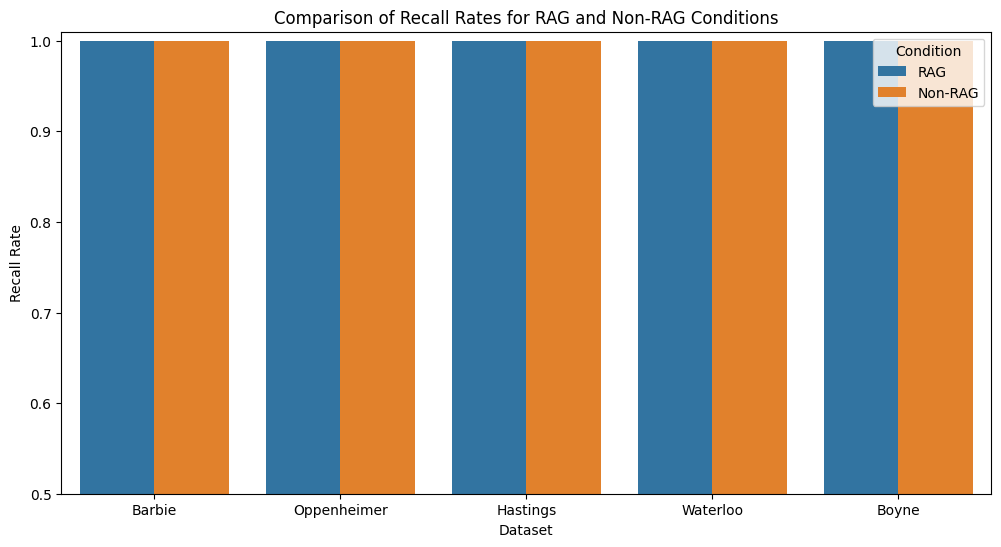

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Process data into DataFrame
def process_data(recall_dict, label):
    data = []
    for dataset, recalls in recall_dict.items():
        for recall in recalls:
            data.append({
                'Dataset': dataset.replace('Summary', ''),
                'Recall': recall,
                'Condition': label
            })
    return pd.DataFrame(data)

df_rag = process_data(rag_recall, 'RAG')
df_nonrag = process_data(nonrag_recall, 'Non-RAG')
df_combined = pd.concat([df_rag, df_nonrag])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='Dataset', y='Recall', hue='Condition', ci=None)
plt.title('Comparison of Recall Rates for RAG and Non-RAG Conditions')
plt.xlabel('Dataset')
plt.ylabel('Recall Rate')
plt.ylim(0.5, 1.01)  # Setting y-axis limits close to 1.0 to show the uniform data clearly
plt.legend(title='Condition')
plt.show()


# Answer Correctness

In [72]:
from datasets import Dataset
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Example data
data_samples = {
    'question': [SummaryBarbieQA["Question"][0]],
    'answer': [RAG_Barbie_response_mistral[1]],
    'ground_truth': [SummaryBarbieQA["Reference Answer"][0]]
}
dataset = Dataset.from_dict(data_samples)

# Load a model for semantic similarity
model = SentenceTransformer('all-MiniLM-L6-v2')

def evaluate_answer_correctness(data):
    results = []
    for answer, ground_truth in zip(data['answer'], data['ground_truth']):
        # Semantic similarity
        answer_emb = model.encode(answer, convert_to_tensor=True)
        truth_emb = model.encode(ground_truth, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(answer_emb, truth_emb).item()
        
        # Factual correctness (simple example using set operations for demonstration)
        answer_facts = set(answer.split())
        ground_truth_facts = set(ground_truth.split())
        tp = len(answer_facts & ground_truth_facts)
        fp = len(answer_facts - ground_truth_facts)
        fn = len(ground_truth_facts - answer_facts)
        
        # F1 score for factual correctness
        if tp + fp + fn == 0:
            factual_score = 0
        else:
            precision = tp / (tp + fp) if (tp + fp) != 0 else 0
            recall = tp / (tp + fn) if (tp + fn) != 0 else 0
            factual_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        # Weighted average of scores
        final_score = 0.5 * semantic_similarity + 0.5 * factual_score
        results.append({'answer': answer, 'ground_truth': ground_truth, 'semantic_similarity': semantic_similarity, 'factual_score': factual_score, 'final_score': final_score})
    
    return results

# Evaluate the dataset
results = evaluate_answer_correctness(dataset)
results


[{'answer': " In the provided context, Ken Ryan Gosling starts as a determined and ambitious leader among the Kens, seeking to change the constitution of Barbie Land to establish a government for the Kens, of the Kens, and by the Kens. His actions are met with resistance from Barbie Margot, who argues against his efforts to alter the status quo. Ken becomes increasingly insistent and aggressive, resulting in him tossing Barbie's belongings off the third floor and evoking her anger and devastation.\n\nAfter Ken's actions, the movie introduces the concept of change and its consequences for all involved. The narrative then shifts to depict a conflict between the Kens, with Ken Ryan Gosling leading one faction against another group of Kens. This battle is portrayed in a dreamlike sequence, culminating in a dance-off that represents their feelings of frustration, helplessness, and masculinity.\n\nLater on, the Kens hold hands post-dance, and Ken Kingsley reminds Ken Ryan Gosling about the p

In [73]:
from datasets import Dataset
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Example data
data_samples = {
    'question': [SummaryBarbieQA["Question"][0]],
    'answer': [RAG_Barbie_response_mistral[1]],
    'ground_truth': [SummaryBarbieQA["Reference Answer"][0]]
}
dataset = Dataset.from_dict(data_samples)

# Load a model for semantic similarity
model = SentenceTransformer('all-MiniLM-L6-v2')

def evaluate_answer_correctness(data):
    results = []
    for answer, ground_truth in zip(data['answer'], data['ground_truth']):
        # Semantic similarity
        answer_emb = model.encode(answer, convert_to_tensor=True)
        truth_emb = model.encode(ground_truth, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(answer_emb, truth_emb).item()
        
        # Factual correctness (simple example using set operations for demonstration)
        answer_facts = set(answer.split())
        ground_truth_facts = set(ground_truth.split())
        tp = len(answer_facts & ground_truth_facts)
        fp = len(answer_facts - ground_truth_facts)
        fn = len(ground_truth_facts - answer_facts)
        
        # F1 score for factual correctness
        if tp + fp + fn == 0:
            factual_score = 0
        else:
            precision = tp / (tp + fp) if (tp + fp) != 0 else 0
            recall = tp / (tp + fn) if (tp + fn) != 0 else 0
            factual_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        # Weighted average of scores
        final_score = 0.5 * semantic_similarity + 0.5 * factual_score
        results.append({'answer': answer, 'ground_truth': ground_truth, 'semantic_similarity': semantic_similarity, 'factual_score': factual_score, 'final_score': final_score})
    
    return results

# Evaluate the dataset
results = evaluate_answer_correctness(dataset)
results


[{'answer': " In the provided context, Ken Ryan Gosling starts as a determined and ambitious leader among the Kens, seeking to change the constitution of Barbie Land to establish a government for the Kens, of the Kens, and by the Kens. His actions are met with resistance from Barbie Margot, who argues against his efforts to alter the status quo. Ken becomes increasingly insistent and aggressive, resulting in him tossing Barbie's belongings off the third floor and evoking her anger and devastation.\n\nAfter Ken's actions, the movie introduces the concept of change and its consequences for all involved. The narrative then shifts to depict a conflict between the Kens, with Ken Ryan Gosling leading one faction against another group of Kens. This battle is portrayed in a dreamlike sequence, culminating in a dance-off that represents their feelings of frustration, helplessness, and masculinity.\n\nLater on, the Kens hold hands post-dance, and Ken Kingsley reminds Ken Ryan Gosling about the p

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import Dataset
import numpy as np
from sentence_transformers import SentenceTransformer, util
import pandas as pd

def evaluate_answer_correctness(responses, ground_truths):
    results = []
    i=0
    for answer, ground_truth in zip(responses, ground_truths):
        # Semantic similarity calculation
        i+=1
        answer_emb = model.encode(answer, convert_to_tensor=True)
        truth_emb = model.encode(ground_truth, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(answer_emb, truth_emb).item()

        # Factual correctness using set operations for demonstration
        answer_facts = set(answer.split())
        ground_truth_facts = set(ground_truth.split())
        tp = len(answer_facts & ground_truth_facts)  # True Positives
        fp = len(answer_facts - ground_truth_facts)  # False Positives
        fn = len(ground_truth_facts - answer_facts)  # False Negatives

        # F1 score for factual correctness
        if tp + fp + fn == 0:
            factual_score = 0
        else:
            precision = tp / (tp + fp) if tp + fp > 0 else 0
            recall = tp / (tp + fn) if tp + fn > 0 else 0
            factual_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Combine semantic similarity and factual score into a final weighted score
        final_score = 0.5 * semantic_similarity + 0.5 * factual_score
        results.append({ "Q":i ,'semantic_similarity': semantic_similarity, 'factual_score': factual_score, 'final_score': final_score})
    
    return results

Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA}


response_lists = {
    "RAG_Barbie_response_mistral": RAG_Barbie_response_mistral,
    "RAG_Oppenheimer_response_mistral": RAG_Oppenheimer_response_mistral
}

# Calculate answer correctness for each dataset
results_correctness = {}
for key, df in Summary_dfs.items():
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "RAG_") + "_response_mistral"]
    
    correctness_scores = evaluate_answer_correctness(responses, ground_truths)
    results_correctness[key] = correctness_scores

# Output the results
for result_key, correctness_scores in results_correctness.items():
    print(f"Results for {result_key.replace('Summary', 'RAG')}: {correctness_scores}")

Results for RAGBarbie: [{'Q': 1, 'semantic_similarity': 0.7661944627761841, 'factual_score': 0.24615384615384617, 'final_score': 0.5061741544650151}, {'Q': 2, 'semantic_similarity': 0.6538404226303101, 'factual_score': 0.16304347826086957, 'final_score': 0.40844195044558984}, {'Q': 3, 'semantic_similarity': 0.8362650871276855, 'factual_score': 0.2992125984251969, 'final_score': 0.5677388427764412}, {'Q': 4, 'semantic_similarity': 0.7802656888961792, 'factual_score': 0.20143884892086328, 'final_score': 0.49085226890852124}, {'Q': 5, 'semantic_similarity': 0.6468040943145752, 'factual_score': 0.205607476635514, 'final_score': 0.4262057854750446}, {'Q': 6, 'semantic_similarity': 0.77454674243927, 'factual_score': 0.11167512690355333, 'final_score': 0.44311093467141166}, {'Q': 7, 'semantic_similarity': 0.7607364058494568, 'factual_score': 0.17105263157894737, 'final_score': 0.46589451871420207}, {'Q': 8, 'semantic_similarity': 0.7342099547386169, 'factual_score': 0.26666666666666666, 'fina

In [75]:
rag_result_correctness_mistral = results_correctness

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import Dataset
import numpy as np
from sentence_transformers import SentenceTransformer, util
import pandas as pd

def evaluate_answer_correctness(responses, ground_truths):
    results = []
    i=0
    for answer, ground_truth in zip(responses, ground_truths):
        # Semantic similarity calculation
        i+=1
        answer_emb = model.encode(answer, convert_to_tensor=True)
        truth_emb = model.encode(ground_truth, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(answer_emb, truth_emb).item()

        # Factual correctness using set operations for demonstration
        answer_facts = set(answer.split())
        ground_truth_facts = set(ground_truth.split())
        tp = len(answer_facts & ground_truth_facts)  # True Positives
        fp = len(answer_facts - ground_truth_facts)  # False Positives
        fn = len(ground_truth_facts - answer_facts)  # False Negatives

        # F1 score for factual correctness
        if tp + fp + fn == 0:
            factual_score = 0
        else:
            precision = tp / (tp + fp) if tp + fp > 0 else 0
            recall = tp / (tp + fn) if tp + fn > 0 else 0
            factual_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Combine semantic similarity and factual score into a final weighted score
        final_score = 0.5 * semantic_similarity + 0.5 * factual_score
        results.append({ "Q":i ,'semantic_similarity': semantic_similarity, 'factual_score': factual_score, 'final_score': final_score})
    
    return results

Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA
}

response_lists = {
    "NONRAG_Barbie_response_mistral": NONRAG_Barbie_response_mistral,
    "NONRAG_Oppenheimer_response_mistral": NONRAG_Oppenheimer_response_mistral}

# Calculate answer correctness for each dataset
results_correctness = {}
for key, df in Summary_dfs.items():
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "NONRAG_") + "_response_mistral"]
    
    correctness_scores = evaluate_answer_correctness(responses, ground_truths)
    results_correctness[key] = correctness_scores

# Output the results
for result_key, correctness_scores in results_correctness.items():
    print(f"Results for {result_key.replace('Summary', 'NONRAG')}: {correctness_scores}")

Results for NONRAGBarbie: [{'Q': 1, 'semantic_similarity': 0.6376643776893616, 'factual_score': 0.13392857142857142, 'final_score': 0.3857964745589665}, {'Q': 2, 'semantic_similarity': 0.7473777532577515, 'factual_score': 0.21333333333333335, 'final_score': 0.4803555432955424}, {'Q': 3, 'semantic_similarity': 0.708232581615448, 'factual_score': 0.19999999999999998, 'final_score': 0.454116290807724}, {'Q': 4, 'semantic_similarity': 0.5784531235694885, 'factual_score': 0.13389121338912136, 'final_score': 0.35617216847930494}, {'Q': 5, 'semantic_similarity': 0.7091680765151978, 'factual_score': 0.15028901734104047, 'final_score': 0.4297285469281191}, {'Q': 6, 'semantic_similarity': 0.5637422204017639, 'factual_score': 0.12206572769953052, 'final_score': 0.3429039740506472}, {'Q': 7, 'semantic_similarity': 0.5089770555496216, 'factual_score': 0.12037037037037038, 'final_score': 0.31467371295999597}, {'Q': 8, 'semantic_similarity': 0.4165121614933014, 'factual_score': 0.24870466321243526, '

In [77]:
nonrag_result_correctness_mistral = results_correctness

In [78]:
nonrag_result_correctness_mistral

{'SummaryBarbie': [{'Q': 1,
   'semantic_similarity': 0.6376643776893616,
   'factual_score': 0.13392857142857142,
   'final_score': 0.3857964745589665},
  {'Q': 2,
   'semantic_similarity': 0.7473777532577515,
   'factual_score': 0.21333333333333335,
   'final_score': 0.4803555432955424},
  {'Q': 3,
   'semantic_similarity': 0.708232581615448,
   'factual_score': 0.19999999999999998,
   'final_score': 0.454116290807724},
  {'Q': 4,
   'semantic_similarity': 0.5784531235694885,
   'factual_score': 0.13389121338912136,
   'final_score': 0.35617216847930494},
  {'Q': 5,
   'semantic_similarity': 0.7091680765151978,
   'factual_score': 0.15028901734104047,
   'final_score': 0.4297285469281191},
  {'Q': 6,
   'semantic_similarity': 0.5637422204017639,
   'factual_score': 0.12206572769953052,
   'final_score': 0.3429039740506472},
  {'Q': 7,
   'semantic_similarity': 0.5089770555496216,
   'factual_score': 0.12037037037037038,
   'final_score': 0.31467371295999597},
  {'Q': 8,
   'semantic_

In [79]:
rag_result_correctness_mistral

{'SummaryBarbie': [{'Q': 1,
   'semantic_similarity': 0.7661944627761841,
   'factual_score': 0.24615384615384617,
   'final_score': 0.5061741544650151},
  {'Q': 2,
   'semantic_similarity': 0.6538404226303101,
   'factual_score': 0.16304347826086957,
   'final_score': 0.40844195044558984},
  {'Q': 3,
   'semantic_similarity': 0.8362650871276855,
   'factual_score': 0.2992125984251969,
   'final_score': 0.5677388427764412},
  {'Q': 4,
   'semantic_similarity': 0.7802656888961792,
   'factual_score': 0.20143884892086328,
   'final_score': 0.49085226890852124},
  {'Q': 5,
   'semantic_similarity': 0.6468040943145752,
   'factual_score': 0.205607476635514,
   'final_score': 0.4262057854750446},
  {'Q': 6,
   'semantic_similarity': 0.77454674243927,
   'factual_score': 0.11167512690355333,
   'final_score': 0.44311093467141166},
  {'Q': 7,
   'semantic_similarity': 0.7607364058494568,
   'factual_score': 0.17105263157894737,
   'final_score': 0.46589451871420207},
  {'Q': 8,
   'semantic_s

In [80]:
# Function to process data into a DataFrame for plotting
def process_scores(results, label):
    data = []
    for dataset, scores in results.items():
        for score in scores:
            data.append({
                'Dataset': dataset,
                'Q': score['Q'],
                'Final Score': score['final_score'],
                'Condition': label
            })
    return pd.DataFrame(data)

### llama 


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import Dataset
import numpy as np
from sentence_transformers import SentenceTransformer, util
import pandas as pd

def evaluate_answer_correctness(responses, ground_truths):
    results = []
    i=0
    for answer, ground_truth in zip(responses, ground_truths):
        # Semantic similarity calculation
        i+=1
        answer_emb = model.encode(answer, convert_to_tensor=True)
        truth_emb = model.encode(ground_truth, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(answer_emb, truth_emb).item()

        # Factual correctness using set operations for demonstration
        answer_facts = set(answer.split())
        ground_truth_facts = set(ground_truth.split())
        tp = len(answer_facts & ground_truth_facts)  # True Positives
        fp = len(answer_facts - ground_truth_facts)  # False Positives
        fn = len(ground_truth_facts - answer_facts)  # False Negatives

        # F1 score for factual correctness
        if tp + fp + fn == 0:
            factual_score = 0
        else:
            precision = tp / (tp + fp) if tp + fp > 0 else 0
            recall = tp / (tp + fn) if tp + fn > 0 else 0
            factual_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Combine semantic similarity and factual score into a final weighted score
        final_score = 0.5 * semantic_similarity + 0.5 * factual_score
        results.append({ "Q":i ,'semantic_similarity': semantic_similarity, 'factual_score': factual_score, 'final_score': final_score})
    
    return results

Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA
}

response_lists = {
    "RAG_Barbie_response_llama": RAG_Barbie_response_Llama,
    "RAG_Oppenheimer_response_llama": RAG_Oppenheimer_response_Llama
}

# Calculate answer correctness for each dataset
results_correctness = {}
for key, df in Summary_dfs.items():
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "RAG_") + "_response_llama"]
    
    correctness_scores = evaluate_answer_correctness(responses, ground_truths)
    results_correctness[key] = correctness_scores

# Output the results
for result_key, correctness_scores in results_correctness.items():
    print(f"Results for {result_key.replace('Summary', 'RAG')}: {correctness_scores}")

Results for RAGBarbie: [{'Q': 1, 'semantic_similarity': 0.7971358895301819, 'factual_score': 0.1897810218978102, 'final_score': 0.49345845571399605}, {'Q': 2, 'semantic_similarity': 0.8697765469551086, 'factual_score': 0.267515923566879, 'final_score': 0.5686462352609938}, {'Q': 3, 'semantic_similarity': 0.7501232028007507, 'factual_score': 0.22641509433962262, 'final_score': 0.48826914857018666}, {'Q': 4, 'semantic_similarity': 0.8677775859832764, 'factual_score': 0.2318840579710145, 'final_score': 0.5498308219771454}, {'Q': 5, 'semantic_similarity': 0.7151902318000793, 'factual_score': 0.11976047904191615, 'final_score': 0.41747535542099773}, {'Q': 6, 'semantic_similarity': 0.758432149887085, 'factual_score': 0.1407035175879397, 'final_score': 0.4495678337375123}, {'Q': 7, 'semantic_similarity': 0.7568231821060181, 'factual_score': 0.1773399014778325, 'final_score': 0.4670815417919253}, {'Q': 8, 'semantic_similarity': 0.7708114981651306, 'factual_score': 0.24858757062146894, 'final_s

In [82]:
rag_result_correctness_llama = results_correctness

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import Dataset
import numpy as np
from sentence_transformers import SentenceTransformer, util
import pandas as pd

def evaluate_answer_correctness(responses, ground_truths):
    results = []
    i=0
    for answer, ground_truth in zip(responses, ground_truths):
        # Semantic similarity calculation
        i+=1
        answer_emb = model.encode(answer, convert_to_tensor=True)
        truth_emb = model.encode(ground_truth, convert_to_tensor=True)
        semantic_similarity = util.pytorch_cos_sim(answer_emb, truth_emb).item()

        # Factual correctness using set operations for demonstration
        answer_facts = set(answer.split())
        ground_truth_facts = set(ground_truth.split())
        tp = len(answer_facts & ground_truth_facts)  # True Positives
        fp = len(answer_facts - ground_truth_facts)  # False Positives
        fn = len(ground_truth_facts - answer_facts)  # False Negatives

        # F1 score for factual correctness
        if tp + fp + fn == 0:
            factual_score = 0
        else:
            precision = tp / (tp + fp) if tp + fp > 0 else 0
            recall = tp / (tp + fn) if tp + fn > 0 else 0
            factual_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Combine semantic similarity and factual score into a final weighted score
        final_score = 0.5 * semantic_similarity + 0.5 * factual_score
        results.append({ "Q":i ,'semantic_similarity': semantic_similarity, 'factual_score': factual_score, 'final_score': final_score})
    
    return results

Summary_dfs = {
    "SummaryBarbie": SummaryBarbieQA,
    "SummaryOppenheimer": SummaryOppenheimerQA
}

response_lists = {
    "NONRAG_Barbie_response_llama": NONRAG_Barbie_response_Llama,
    "NONRAG_Oppenheimer_response_llama": NONRAG_Oppenheimer_response_Llama
}

# Calculate answer correctness for each dataset
results_correctness = {}
for key, df in Summary_dfs.items():
    questions = df['Question'].tolist()
    ground_truths = df['Reference Answer'].tolist()
    responses = response_lists[key.replace("Summary", "NONRAG_") + "_response_llama"]
    
    correctness_scores = evaluate_answer_correctness(responses, ground_truths)
    results_correctness[key] = correctness_scores

# Output the results
for result_key, correctness_scores in results_correctness.items():
    print(f"Results for {result_key.replace('Summary', 'NONRAG')}: {correctness_scores}")

Results for NONRAGBarbie: [{'Q': 1, 'semantic_similarity': 0.783086895942688, 'factual_score': 0.20408163265306123, 'final_score': 0.4935842642978746}, {'Q': 2, 'semantic_similarity': 0.491793155670166, 'factual_score': 0.22330097087378642, 'final_score': 0.3575470632719762}, {'Q': 3, 'semantic_similarity': 0.5334863066673279, 'factual_score': 0.2268041237113402, 'final_score': 0.38014521518933403}, {'Q': 4, 'semantic_similarity': 0.6882702112197876, 'factual_score': 0.19883040935672516, 'final_score': 0.44355031028825637}, {'Q': 5, 'semantic_similarity': 0.7563493847846985, 'factual_score': 0.1806451612903226, 'final_score': 0.46849727303751054}, {'Q': 6, 'semantic_similarity': 0.7159665822982788, 'factual_score': 0.16666666666666666, 'final_score': 0.4413166244824727}, {'Q': 7, 'semantic_similarity': 0.7408931255340576, 'factual_score': 0.15254237288135591, 'final_score': 0.4467177492077068}, {'Q': 8, 'semantic_similarity': 0.35242733359336853, 'factual_score': 0.18584070796460178, '

In [84]:
nonrag_result_correctness_llama = results_correctness

# Summary Based Graphs

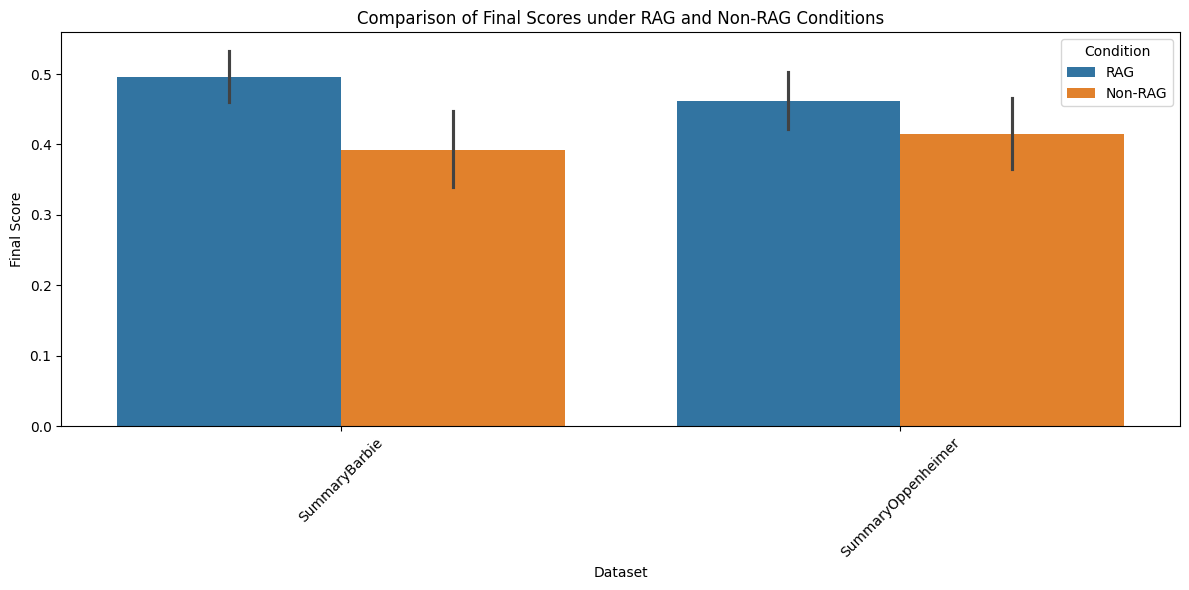

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_rag = process_scores(rag_result_correctness_mistral, 'RAG')
df_nonrag = process_scores(nonrag_result_correctness_mistral, 'Non-RAG')

# Combine DataFrames
df_combined = pd.concat([df_rag, df_nonrag])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='Dataset', y='Final Score', hue='Condition')
plt.title('Comparison of Final Scores under RAG and Non-RAG Conditions')
plt.xlabel('Dataset')
plt.ylabel('Final Score')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

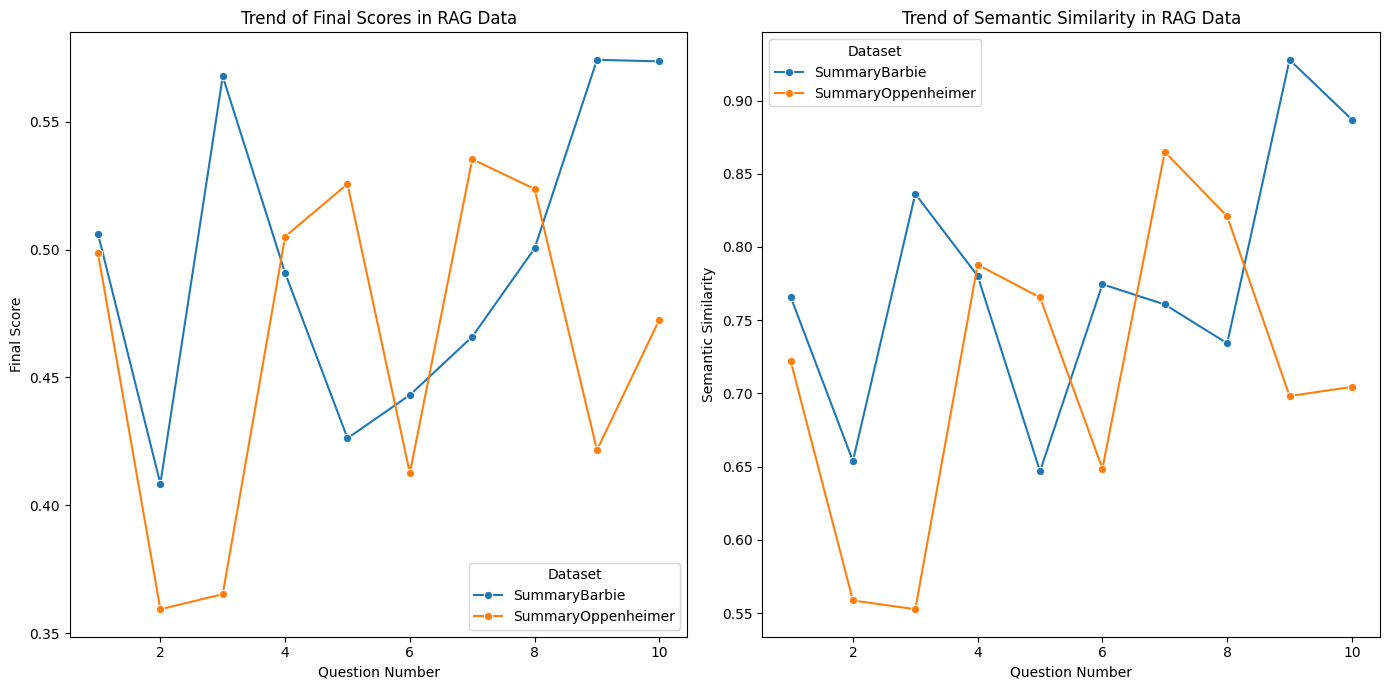

In [86]:
def process_rag_data(rag_data):
    rows = []
    for dataset, entries in rag_data.items():
        for entry in entries:
            rows.append({
                'Dataset': dataset,
                'Question': entry['Q'],
                'Semantic Similarity': entry['semantic_similarity'],
                'Final Score': entry['final_score']
            })
    return pd.DataFrame(rows)

# Convert data to DataFrame
df_rag = process_rag_data(rag_result_correctness_mistral)

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_rag, x='Question', y='Final Score', hue='Dataset', marker='o')
plt.title('Trend of Final Scores in RAG Data')
plt.xlabel('Question Number')
plt.ylabel('Final Score')

plt.subplot(1, 2, 2)
sns.lineplot(data=df_rag, x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
plt.title('Trend of Semantic Similarity in RAG Data')
plt.xlabel('Question Number')
plt.ylabel('Semantic Similarity')

plt.tight_layout()
plt.show()

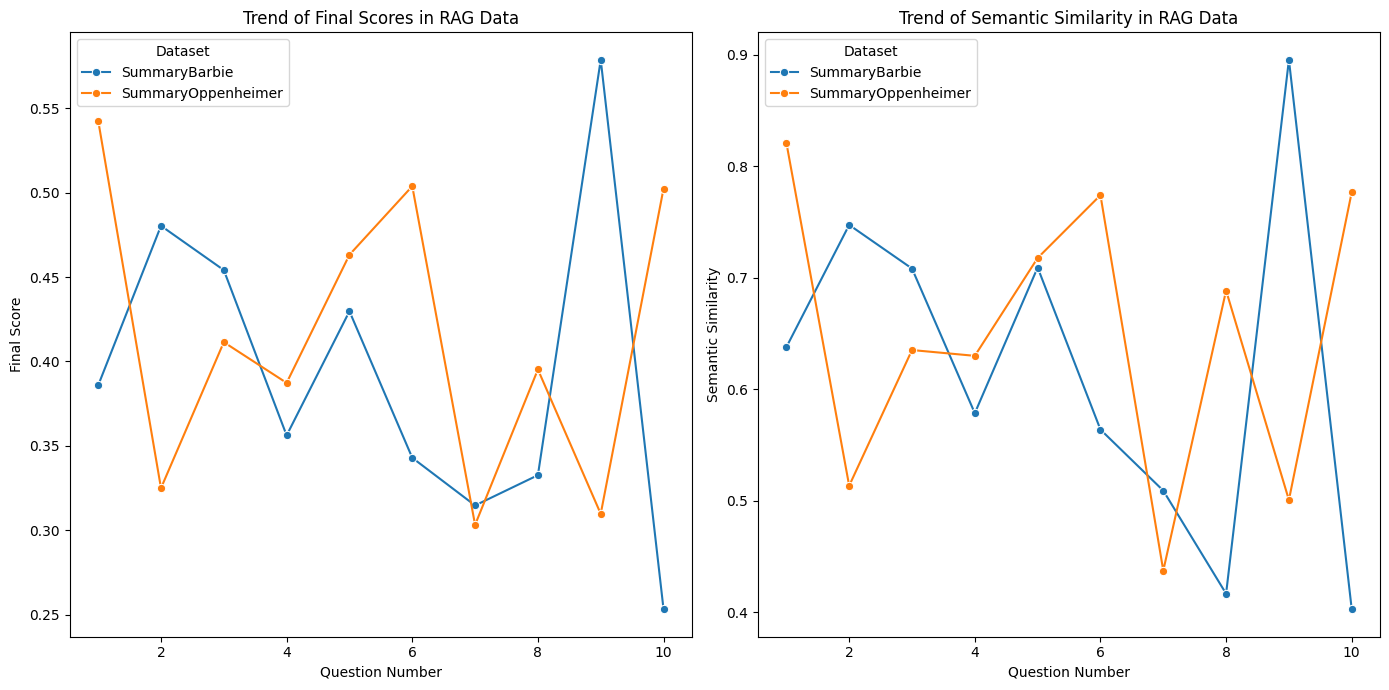

In [87]:
def process_rag_data(rag_data):
    rows = []
    for dataset, entries in rag_data.items():
        for entry in entries:
            rows.append({
                'Dataset': dataset,
                'Question': entry['Q'],
                'Semantic Similarity': entry['semantic_similarity'],
                'Final Score': entry['final_score']
            })
    return pd.DataFrame(rows)

# Convert data to DataFrame
df_rag = process_rag_data(nonrag_result_correctness_mistral)

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_rag, x='Question', y='Final Score', hue='Dataset', marker='o')
plt.title('Trend of Final Scores in RAG Data')
plt.xlabel('Question Number')
plt.ylabel('Final Score')

plt.subplot(1, 2, 2)
sns.lineplot(data=df_rag, x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
plt.title('Trend of Semantic Similarity in RAG Data')
plt.xlabel('Question Number')
plt.ylabel('Semantic Similarity')

plt.tight_layout()
plt.show()

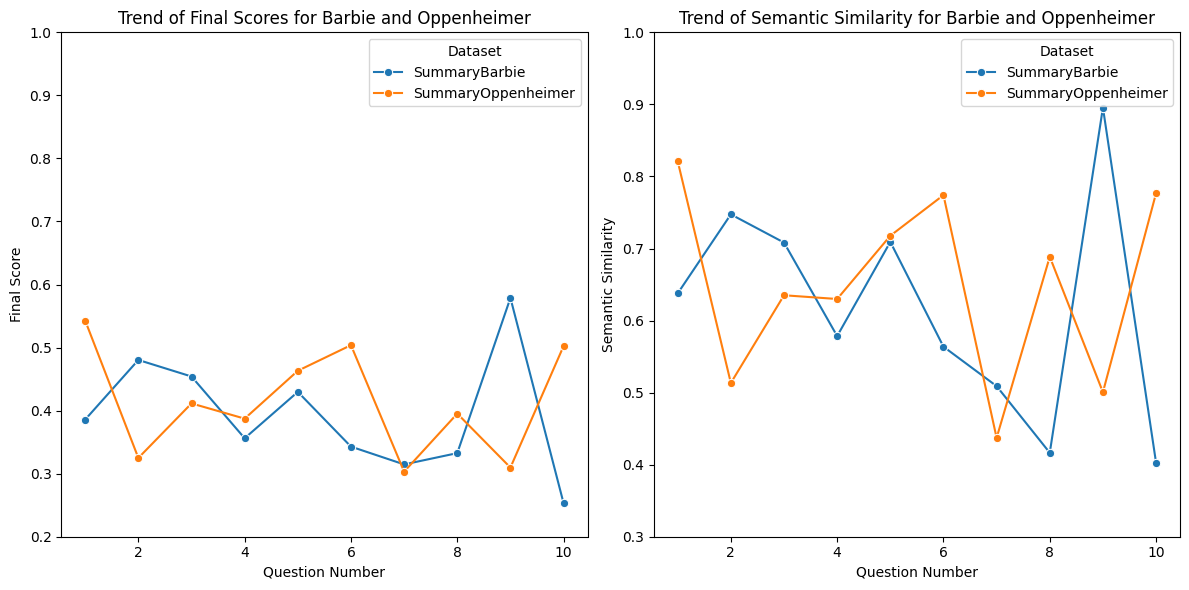

In [88]:
def process_rag_data(rag_data):
    rows = []
    for dataset, entries in rag_data.items():
        for entry in entries:
            rows.append({
                'Dataset': dataset,
                'Question': entry['Q'],
                'Semantic Similarity': entry['semantic_similarity'],
                'Final Score': entry['final_score']
            })
    return pd.DataFrame(rows)

# Convert data to DataFrame
df_rag = process_rag_data(nonrag_result_correctness_mistral)

# Set consistent y-axis limits
y_lim_semantic_similarity = (0.3, 1.0)
y_lim_final_score = (0.2, 1.0)

# First figure for Barbie and Oppenheimer
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryBarbie', 'SummaryOppenheimer'])], 
             x='Question', y='Final Score', hue='Dataset', marker='o')
plt.title('Trend of Final Scores for Barbie and Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Final Score')
plt.ylim(y_lim_final_score)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryBarbie', 'SummaryOppenheimer'])], 
             x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
plt.title('Trend of Semantic Similarity for Barbie and Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Semantic Similarity')
plt.ylim(y_lim_semantic_similarity)
plt.tight_layout()

# # Second figure for Hastings, Waterloo, and Boyne
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryHastings', 'SummaryWaterloo', 'SummaryBoyne'])], 
#              x='Question', y='Final Score', hue='Dataset', marker='o')
# plt.title('Trend of Final Scores for Hastings, Waterloo, and Boyne')
# plt.xlabel('Question Number')
# plt.ylabel('Final Score')
# plt.ylim(y_lim_final_score)

# plt.subplot(1, 2, 2)
# sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryHastings', 'SummaryWaterloo', 'SummaryBoyne'])], 
#              x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
# plt.title('Trend of Semantic Similarity for Hastings, Waterloo, and Boyne')
# plt.xlabel('Question Number')
# plt.ylabel('Semantic Similarity')
# plt.ylim(y_lim_semantic_similarity)
# plt.tight_layout()

plt.show()

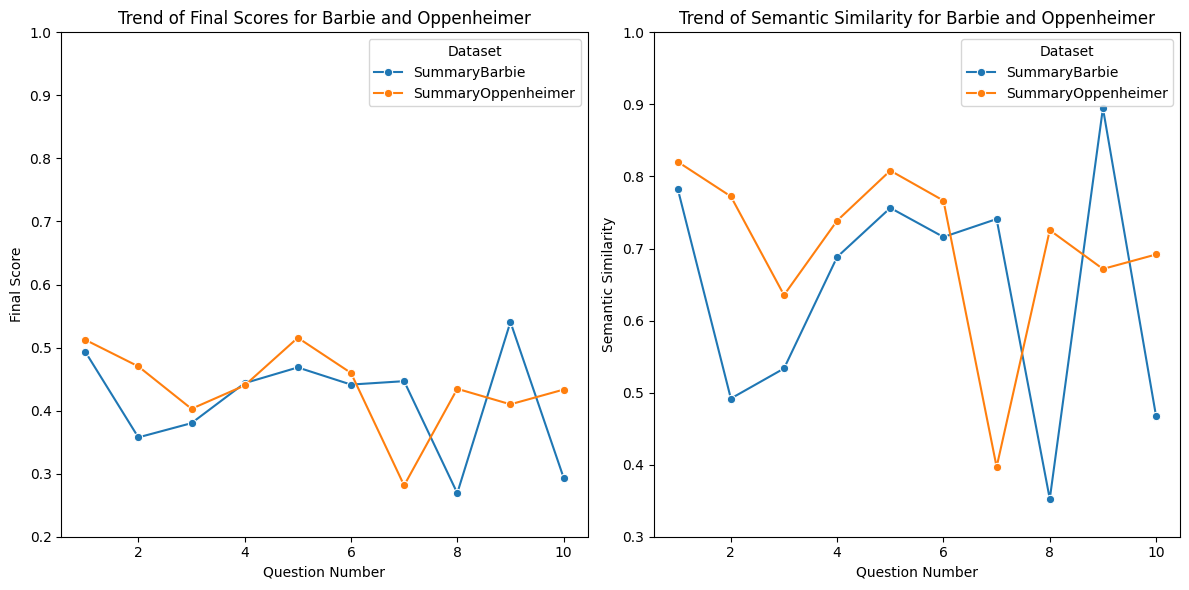

In [89]:
def process_rag_data(rag_data):
    rows = []
    for dataset, entries in rag_data.items():
        for entry in entries:
            rows.append({
                'Dataset': dataset,
                'Question': entry['Q'],
                'Semantic Similarity': entry['semantic_similarity'],
                'Final Score': entry['final_score']
            })
    return pd.DataFrame(rows)

# Convert data to DataFrame
df_rag = process_rag_data(nonrag_result_correctness_llama)

# Set consistent y-axis limits
y_lim_semantic_similarity = (0.3, 1.0)
y_lim_final_score = (0.2, 1.0)

# First figure for Barbie and Oppenheimer
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryBarbie', 'SummaryOppenheimer'])], 
             x='Question', y='Final Score', hue='Dataset', marker='o')
plt.title('Trend of Final Scores for Barbie and Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Final Score')
plt.ylim(y_lim_final_score)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryBarbie', 'SummaryOppenheimer'])], 
             x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
plt.title('Trend of Semantic Similarity for Barbie and Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Semantic Similarity')
plt.ylim(y_lim_semantic_similarity)
plt.tight_layout()

# # Second figure for Hastings, Waterloo, and Boyne
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryHastings', 'SummaryWaterloo', 'SummaryBoyne'])], 
#              x='Question', y='Final Score', hue='Dataset', marker='o')
# plt.title('Trend of Final Scores for Hastings, Waterloo, and Boyne')
# plt.xlabel('Question Number')
# plt.ylabel('Final Score')
# plt.ylim(y_lim_final_score)

# plt.subplot(1, 2, 2)
# sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryHastings', 'SummaryWaterloo', 'SummaryBoyne'])], 
#              x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
# plt.title('Trend of Semantic Similarity for Hastings, Waterloo, and Boyne')
# plt.xlabel('Question Number')
# plt.ylabel('Semantic Similarity')
# plt.ylim(y_lim_semantic_similarity)
# plt.tight_layout()

plt.show()

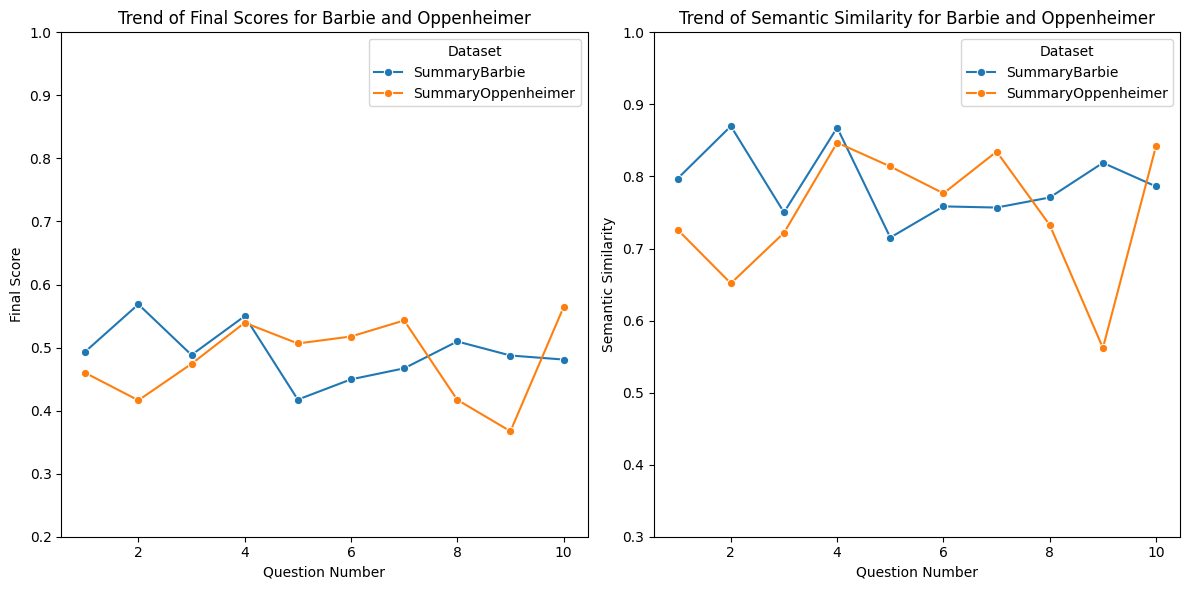

In [90]:
def process_rag_data(rag_data):
    rows = []
    for dataset, entries in rag_data.items():
        for entry in entries:
            rows.append({
                'Dataset': dataset,
                'Question': entry['Q'],
                'Semantic Similarity': entry['semantic_similarity'],
                'Final Score': entry['final_score']
            })
    return pd.DataFrame(rows)

# Convert data to DataFrame
df_rag = process_rag_data(rag_result_correctness_llama)

# Set consistent y-axis limits
y_lim_semantic_similarity = (0.3, 1.0)
y_lim_final_score = (0.2, 1.0)

# First figure for Barbie and Oppenheimer
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryBarbie', 'SummaryOppenheimer'])], 
             x='Question', y='Final Score', hue='Dataset', marker='o')
plt.title('Trend of Final Scores for Barbie and Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Final Score')
plt.ylim(y_lim_final_score)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryBarbie', 'SummaryOppenheimer'])], 
             x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
plt.title('Trend of Semantic Similarity for Barbie and Oppenheimer')
plt.xlabel('Question Number')
plt.ylabel('Semantic Similarity')
plt.ylim(y_lim_semantic_similarity)
plt.tight_layout()

# # Second figure for Hastings, Waterloo, and Boyne
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryHastings', 'SummaryWaterloo', 'SummaryBoyne'])], 
#              x='Question', y='Final Score', hue='Dataset', marker='o')
# plt.title('Trend of Final Scores for Hastings, Waterloo, and Boyne')
# plt.xlabel('Question Number')
# plt.ylabel('Final Score')
# plt.ylim(y_lim_final_score)

# plt.subplot(1, 2, 2)
# sns.lineplot(data=df_rag[df_rag['Dataset'].isin(['SummaryHastings', 'SummaryWaterloo', 'SummaryBoyne'])], 
#              x='Question', y='Semantic Similarity', hue='Dataset', marker='o')
# plt.title('Trend of Semantic Similarity for Hastings, Waterloo, and Boyne')
# plt.xlabel('Question Number')
# plt.ylabel('Semantic Similarity')
# plt.ylim(y_lim_semantic_similarity)
# plt.tight_layout()

plt.show()

In [91]:
# Faithfullness 

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Simple function to check if a statement can be inferred from the context
def can_infer(statement, context):
    vectorizer = TfidfVectorizer().fit([context])
    context_vector = vectorizer.transform([context])
    statement_vector = vectorizer.transform([statement])
    similarity = cosine_similarity(context_vector, statement_vector)[0][0]
    return similarity > 0.5  # threshold for similarity, can be adjusted

# Context and answer as per your example
context = "Albert Einstein (born 14 March 1879) was a German-born theoretical physicist, widely held to be one of the greatest and most influential scientists of all time"
answer = "Einstein was born in Germany on 20th March 1879."

# Break the answer into statements
statements = [s.strip() for s in answer.split('.') if s]

# Verify each statement against the context
inferred_statements = sum(can_infer(statement, context) for statement in statements)

# Calculate faithfulness
faithfulness_score = inferred_statements / len(statements) if statements else 0

print("Faithfulness Score:", faithfulness_score)


Faithfulness Score: 0.0


# finally working with BLEU Score for graphs and tables 

In [93]:
NONRAG_SummaryTestLlama_all

{'storageBarbie_llama2_responses_BERT': [CompletionResponse(text="\nThe main plot of the Barbie movie focuses on Barbie Margot's (played by Barbie Roberts) journey as she embarks on a magical adventure to find her true identity and purpose in life. Here is a summary of Margot's journey:\n\nAct I:\n\n* Margot is introduced as a shy and insecure young girl who feels lost and uncertain about her future.\n* She discovers a mysterious invitation to a magical fairy tale kingdom, where she meets the kind-hearted and wise Fairy Godmother (played by Barbie).\n* The Fairy Godmother helps Margot embrace her unique qualities and discover her true potential.\n\nAct II:\n\n* Margot embarks on a journey through the fairy tale kingdom, where she meets various characters who teach her valuable lessons about self-confidence, perseverance, and the power of belief.\n* She faces challenges and obstacles along the way, but with the help of her new friends and the Fairy Godmother's guidance, she learns to em

In [94]:
len(NONRAG_SummaryTestMistral_all.keys())

10

In [95]:
RAG_SummaryTestLlama_all

{'storageBarbie_llama2_responses_BERT': ["Barbie Margot, a former Barbie who was brainwashed by the patriarchy, sets out to free other Barbies from their oppressive Ken overlords. She assembles a team of rebellious Barbies and together they hatch a plan to take down the Kens and reclaim their power. Along the way, Margot discovers her own inner strength and authority, becoming a symbol of hope for other Barbies seeking liberation. The movie culminates in a heist-like mission, where the Barbies successfully execute their plan and break free from their Kens' control, ushering in a new era of Barbie empowerment. Throughout her journey, Margot faces various challenges and obstacles but ultimately emerges victorious, inspiring other Barbies to join the fight for their freedom.",
  'Throughout the movie "Barbie and the Kens," Ken\'s character undergoes significant development as he evolves from a selfish and arrogant person to a more empathetic and caring individual. At the beginning of the 

In [96]:
import matplotlib.pyplot as plt

# Assuming 'NONRAG_SummaryTestMistral_all' is a dictionary containing all the necessary data
# Sample loading mechanism, replace or adjust as necessary based on actual data structure

# Function to plot the scores
def plot_scores(datasets, metric_keys, title, ylabel):
    plt.figure(figsize=(10, 6))
    for dataset in datasets:
        scores = NONRAG_SummaryTestMistral_all[f'storage{dataset}_mistral_{metric_keys}']
        plt.plot(scores, label=f'{dataset} Scores')
    plt.title(f'NON RAG Trend of {title} Scores for Boyne, Hastings, and Waterloo by Mistral')
    plt.xlabel('Data Points')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot BERT F1 Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_F1_scores', 'BERT F1', 'F1 Score')

# Plot BERT R Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_R_scores', 'BERT R', 'Recall Score')

# Plot BERT P Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_P_scores', 'BERT P', 'Precision Score')


KeyError: 'storageBoyne_mistral_BERT_F1_scores'

<Figure size 1000x600 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt

# Assuming 'NONRAG_SummaryTestMistral_all' is a dictionary containing all the necessary data
# Sample loading mechanism, replace or adjust as necessary based on actual data structure

# Function to plot the scores
def plot_scores(datasets, metric_keys, title, ylabel, ylim=None):
    plt.figure(figsize=(10, 6))
    for dataset in datasets:
        scores = NONRAG_SummaryTestMistral_all[f'storage{dataset}_mistral_{metric_keys}']
        plt.plot(scores, label=f'{dataset} Scores')
    plt.title(f'NONRAG Trend of {title} Scores for Boyne, Hastings, and Waterloo by Mistral')
    plt.xlabel('Data Points')
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    filename = title.replace(' ', '_')
    
    plt.savefig(f'EvaluationFigs/Battle_nonrag{filename}_mistral.png')
    plt.show()

# Define consistent Y-axis limits for each type of score
f1_ylim = (0.6, 1)  # Assuming F1 scores are between 0 and 1
r_ylim = (0.6, 1)   # Assuming Recall scores are between 0 and 1
p_ylim = (0.6, 1)   # Assuming Precision scores are between 0 and 1

# Plot BERT F1 Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_F1_scores', 'BERT F1', 'F1 Score', f1_ylim)

# Plot BERT R Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_R_scores', 'BERT R', 'Recall Score', r_ylim)

# Plot BERT P Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_P_scores', 'BERT P', 'Precision Score', p_ylim)


KeyError: 'storageBoyne_mistral_BERT_F1_scores'

<Figure size 1000x600 with 0 Axes>

In [98]:
import matplotlib.pyplot as plt

# Assuming 'NONRAG_SummaryTestMistral_all' is a dictionary containing all the necessary data
# Sample loading mechanism, replace or adjust as necessary based on actual data structure

# Function to plot the scores
def plot_scores(datasets, metric_keys, title, ylabel, ylim=None):
    plt.figure(figsize=(10, 6))
    for dataset in datasets:
        scores = RAG_SummaryTestMistral_all[f'storage{dataset}_mistral_{metric_keys}']
        plt.plot(scores, label=f'{dataset} Scores')
    plt.title(f'RAG Trend of {title} Scores for Boyne, Hastings, and Waterloo by Mistral')
    plt.xlabel('Data Points')
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    filename = title.replace(' ', '_')
    
    plt.savefig(f'EvaluationFigs/Battle_rag{filename}_mistral.png')
    plt.show()

# Define consistent Y-axis limits for each type of score
f1_ylim = (0.6, 1)  # Assuming F1 scores are between 0 and 1
r_ylim = (0.6, 1)   # Assuming Recall scores are between 0 and 1
p_ylim = (0.6, 1)   # Assuming Precision scores are between 0 and 1

# Plot BERT F1 Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_F1_scores', 'BERT F1', 'F1 Score', f1_ylim)

# Plot BERT R Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_R_scores', 'BERT R', 'Recall Score', r_ylim)

# Plot BERT P Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_P_scores', 'BERT P', 'Precision Score', p_ylim)


KeyError: 'storageBoyne_mistral_BERT_F1_scores'

<Figure size 1000x600 with 0 Axes>

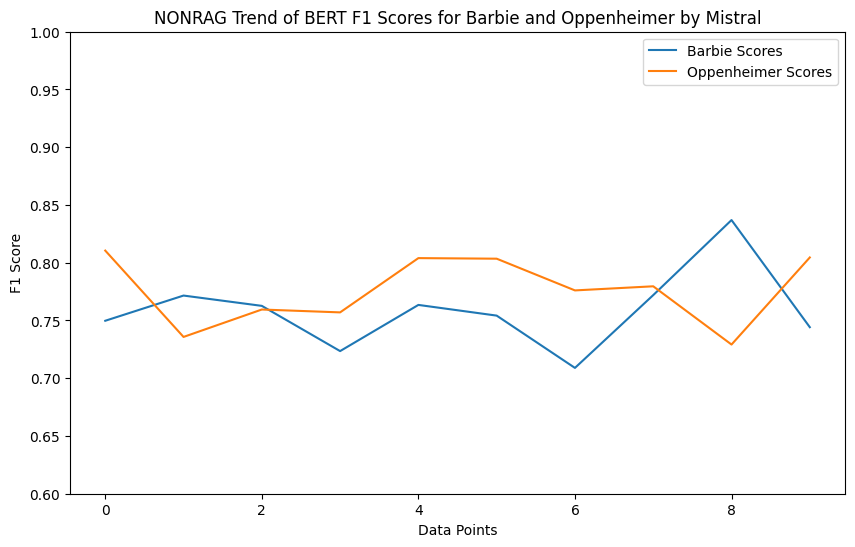

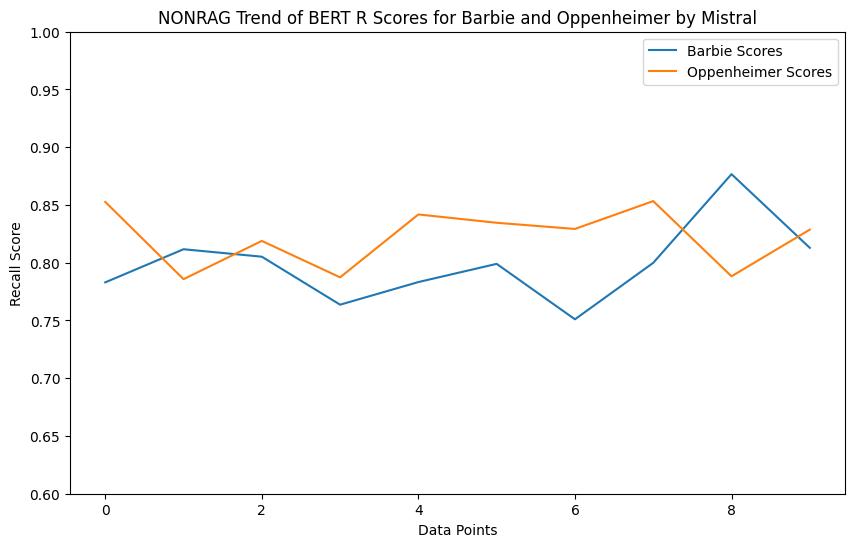

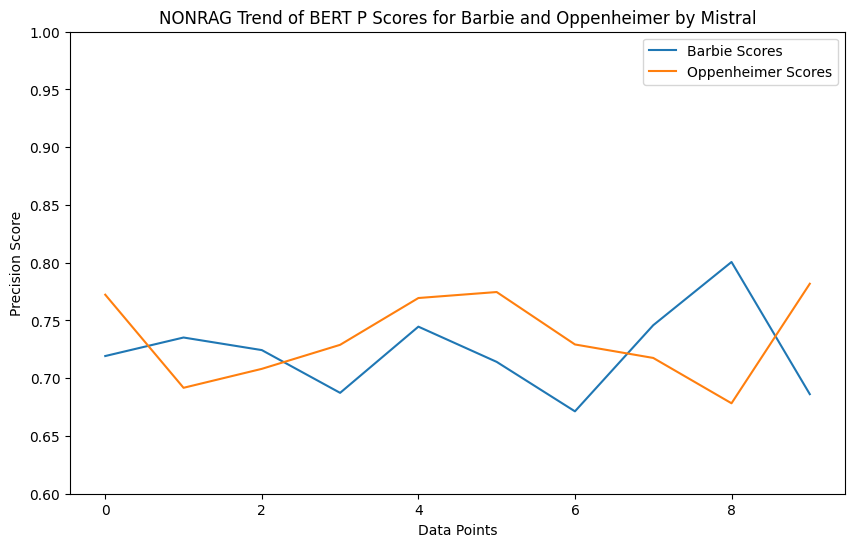

In [99]:
import matplotlib.pyplot as plt

# Assuming 'NONRAG_SummaryTestMistral_all' is a dictionary containing all the necessary data
# Sample loading mechanism, replace or adjust as necessary based on actual data structure

# Function to plot the scores
def plot_scores(datasets, metric_keys, title, ylabel, ylim=None):
    plt.figure(figsize=(10, 6))
    for dataset in datasets:
        scores = NONRAG_SummaryTestMistral_all[f'storage{dataset}_mistral_{metric_keys}']
        plt.plot(scores, label=f'{dataset} Scores')
    plt.title(f'NONRAG Trend of {title} Scores for Barbie and Oppenheimer by Mistral')
    plt.xlabel('Data Points')
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    filename = title.replace(' ', '_')
    
    plt.savefig(f'EvaluationFigs/Movie_nonrag{filename}_mistral.png')
    plt.show()

# Define consistent Y-axis limits for each type of score
f1_ylim = (0.6, 1)  # Assuming F1 scores are between 0 and 1
r_ylim = (0.6, 1)   # Assuming Recall scores are between 0 and 1
p_ylim = (0.6, 1)   # Assuming Precision scores are between 0 and 1

# Plot BERT F1 Scores
plot_scores(['Barbie', 'Oppenheimer'], 'BERT_F1_scores', 'BERT F1', 'F1 Score', f1_ylim)

# Plot BERT R Scores
plot_scores(['Barbie', 'Oppenheimer'], 'BERT_R_scores', 'BERT R', 'Recall Score', r_ylim)

# Plot BERT P Scores
plot_scores(['Barbie', 'Oppenheimer'], 'BERT_P_scores', 'BERT P', 'Precision Score', p_ylim)


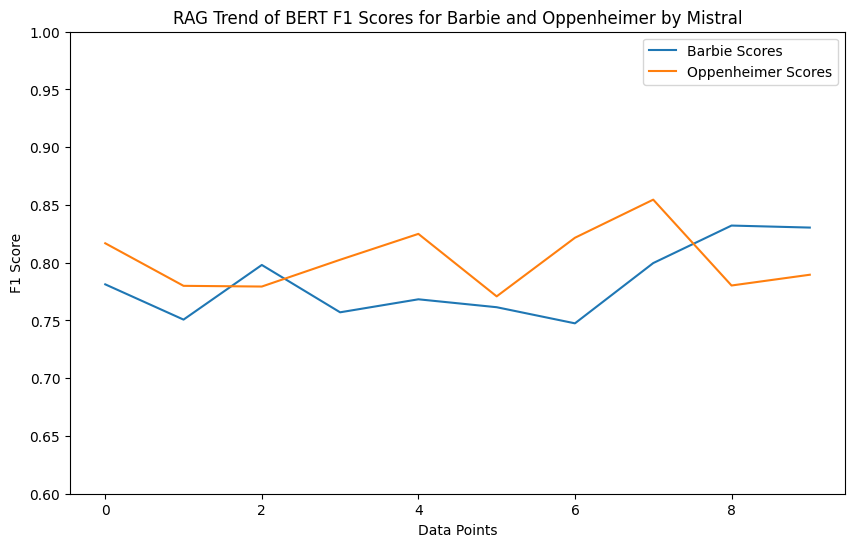

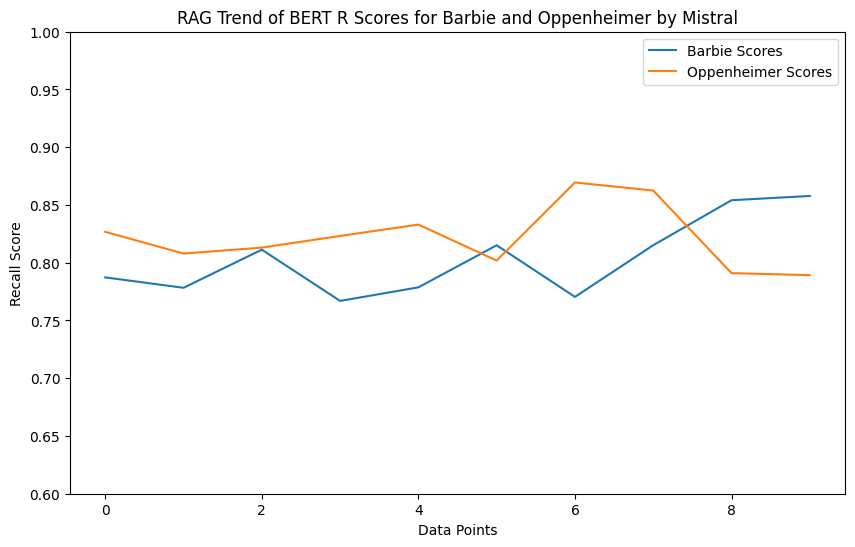

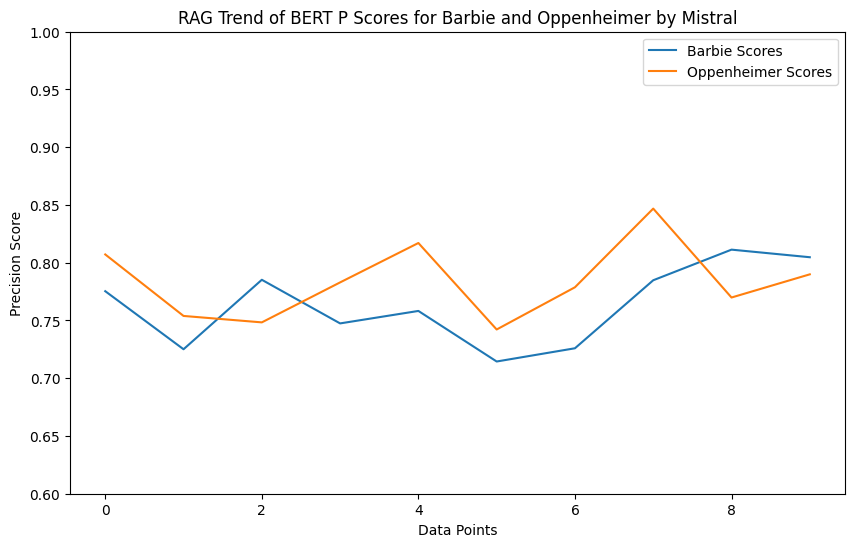

In [100]:
import matplotlib.pyplot as plt

# Assuming 'NONRAG_SummaryTestMistral_all' is a dictionary containing all the necessary data
# Sample loading mechanism, replace or adjust as necessary based on actual data structure

# Function to plot the scores
def plot_scores(datasets, metric_keys, title, ylabel, ylim=None):
    plt.figure(figsize=(10, 6))
    for dataset in datasets:
        scores = RAG_SummaryTestMistral_all[f'storage{dataset}_mistral_{metric_keys}']
        plt.plot(scores, label=f'{dataset} Scores')
    plt.title(f'RAG Trend of {title} Scores for Barbie and Oppenheimer by Mistral')
    plt.xlabel('Data Points')
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    filename = title.replace(' ', '_')
    
    plt.savefig(f'EvaluationFigs/Movie_rag{filename}_mistral.png')
    plt.show()

# Define consistent Y-axis limits for each type of score
f1_ylim = (0.6, 1)  # Assuming F1 scores are between 0 and 1
r_ylim = (0.6, 1)   # Assuming Recall scores are between 0 and 1
p_ylim = (0.6, 1)   # Assuming Precision scores are between 0 and 1

# Plot BERT F1 Scores
plot_scores(['Barbie', 'Oppenheimer'], 'BERT_F1_scores', 'BERT F1', 'F1 Score', f1_ylim)

# Plot BERT R Scores
plot_scores(['Barbie', 'Oppenheimer'], 'BERT_R_scores', 'BERT R', 'Recall Score', r_ylim)

# Plot BERT P Scores
plot_scores(['Barbie', 'Oppenheimer'], 'BERT_P_scores', 'BERT P', 'Precision Score', p_ylim)


In [101]:
import matplotlib.pyplot as plt

# Assuming 'NONRAG_SummaryTestMistral_all' is a dictionary containing all the necessary data
# Sample loading mechanism, replace or adjust as necessary based on actual data structure

# Function to plot the scores
def plot_scores(datasets, metric_keys, title, ylabel, ylim=None):
    plt.figure(figsize=(10, 6))
    for dataset in datasets:
        scores = RAG_SummaryTestMistral_all[f'storage{dataset}_mistral_{metric_keys}']
        plt.plot(scores, label=f'{dataset} Scores')
    plt.title(f'NONRAG Trend of {title} Scores for Boyne, Hastings, and Waterloo by Mistral')
    plt.xlabel('Data Points')
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.legend()
    filename = title.replace(' ', '_')
    
    plt.savefig(f'EvaluationFigs/Battle_rag{filename}_mistral.png')
    plt.show()

# Define consistent Y-axis limits for each type of score
f1_ylim = (0.6, 1)  # Assuming F1 scores are between 0 and 1
r_ylim = (0.6, 1)   # Assuming Recall scores are between 0 and 1
p_ylim = (0.6, 1)   # Assuming Precision scores are between 0 and 1

# Plot BERT F1 Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_F1_scores', 'BERT F1', 'F1 Score', f1_ylim)

# Plot BERT R Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_R_scores', 'BERT R', 'Recall Score', r_ylim)

# Plot BERT P Scores
plot_scores(['Boyne', 'Hastings', 'Waterloo'], 'BERT_P_scores', 'BERT P', 'Precision Score', p_ylim)


KeyError: 'storageBoyne_mistral_BERT_F1_scores'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd

# Assuming 'NONRAG_SummaryTestMistral_all' is already defined and loaded

# List of experiments to include
experiments = ['Boyne', 'Hastings', 'Waterloo', 'Barbie', 'Oppenheimer']

# Initialize an empty list to collect data
data = []

# Loop through each experiment and collect BERT scores
for experiment in experiments:
    for score_type in ['BERT_P_scores', 'BERT_R_scores', 'BERT_F1_scores']:
        score_label = score_type.split('_')[1]  # Extract 'P', 'R', or 'F1' from the string
        # Append each score to the data list as a dictionary
        data.append({
            'Experiment': experiment,
            'Score Type': score_label,
            'Values': NONRAG_SummaryTestMistral_all[f'storage{experiment}_mistral_{score_type}']
        })

# Convert the list of dictionaries to a DataFrame
NONRAGMISTRAL_bert_scores_df = pd.DataFrame(data)

# This will display the DataFrame, replace with print(bert_scores_df) if running in a script
NONRAGMISTRAL_bert_scores_df


KeyError: 'storageBoyne_mistral_BERT_P_scores'

In [102]:
import pandas as pd

# Assuming 'NONRAG_SummaryTestMistral_all' is already defined and loaded

# List of experiments to include
experiments = ['Boyne', 'Hastings', 'Waterloo', 'Barbie', 'Oppenheimer']

# Initialize an empty list to collect data
data = []

# Loop through each experiment and collect BERT scores
for experiment in experiments:
    for score_type in ['BERT_P_scores', 'BERT_R_scores', 'BERT_F1_scores']:
        score_label = score_type.split('_')[1]  # Extract 'P', 'R', or 'F1' from the string
        # Append each score to the data list as a dictionary
        data.append({
            'Experiment': experiment,
            'Score Type': score_label,
            'Values': RAG_SummaryTestMistral_all[f'storage{experiment}_mistral_{score_type}']
        })

# Convert the list of dictionaries to a DataFrame
RAGMISTRAL_bert_scores_df = pd.DataFrame(data)

# This will display the DataFrame, replace with print(bert_scores_df) if running in a script
RAGMISTRAL_bert_scores_df


KeyError: 'storageBoyne_mistral_BERT_P_scores'

In [103]:
RAGMISTRAL_bert_scores_df

NameError: name 'RAGMISTRAL_bert_scores_df' is not defined

# NLP Metrics Summary based task: 

### NLP BARBIE Summary

In [104]:
SummaryBarbieQA

,Question,Reference Answer
0,Summarize the main plot of the Barbie movie fo...,"In the Barbie movie, Barbie Margot experiences..."
1,Provide a summary of Ken's character developme...,"Throughout the Barbie movie, Ken undergoes sig..."
2,Describe the conflict and resolution encounter...,Barbie Margot faces a major conflict when she ...
3,Summarize the role of the Mattel executives in...,The Mattel executives in the Barbie movie play...
4,Provide a summary of the climax of the Barbie ...,The climax of the Barbie movie occurs when Bar...
5,Summarize Barbie's influence on the other char...,"In the movie, Barbie serves as a catalyst for ..."
6,Describe the transformation of Barbie Land thr...,Barbie Land undergoes significant transformati...
7,Provide a summary of the film's resolution and...,The resolution of the Barbie movie underscores...
8,Summarize the role of humor and satire in the ...,Humor and satire are pivotal in the Barbie mov...
9,Describe how the movie addresses themes of emp...,The movie tackles empowerment and self-discove...


The question: Summarize the scientific contributions of J. Robert Oppenheimer as depicted in the movie.



/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Metrics for Response_experiment1_llama2:
BLEU Score: 1.1631407528034758e-78
ROUGE Scores: {'rouge1': Score(precision=0.15718157181571815, recall=0.7435897435897436, fmeasure=0.2595078299776286), 'rouge2': Score(precision=0.051630434782608696, recall=0.24675324675324675, fmeasure=0.0853932584269663), 'rougeL': Score(precision=0.1002710027100271, recall=0.47435897435897434, fmeasure=0.16554809843400448)}
TER Score: 442.1052631578948
Cosine Similarities: [0.58874585]

Metrics for Response_experiment1_mistral:
BLEU Score: 0.04815864801331019
ROUGE Scores: {'rouge1': Score(precision=0.14496314496314497, recall=0.7564102564102564, fmeasure=0.24329896907216494), 'rouge2': Score(precision=0.06896551724137931, recall=0.36363636363636365, fmeasure=0.11594202898550723), 'rougeL': Score(precision=0.09336609336609336, recall=0.48717948717948717, fmeasure=0.15670103092783502)}
TER Score: 490.7894736842105
Cosine Similarities: [0.64570777]



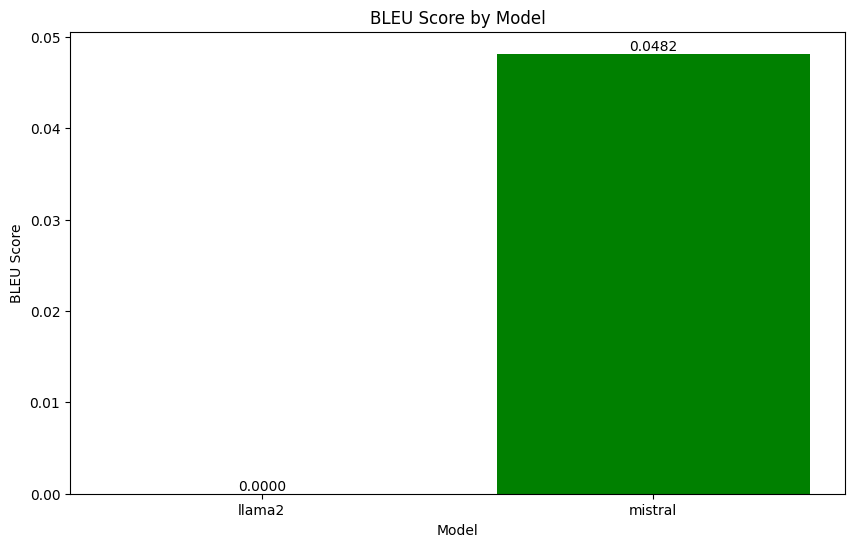

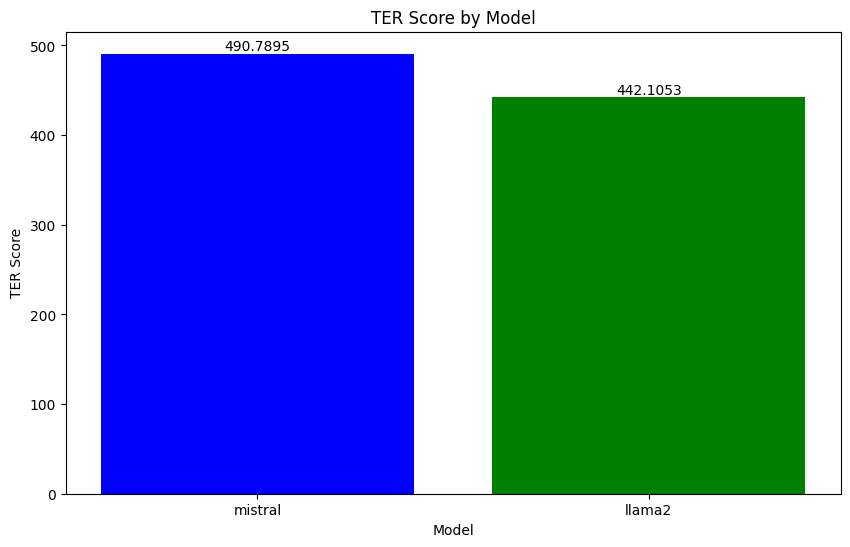

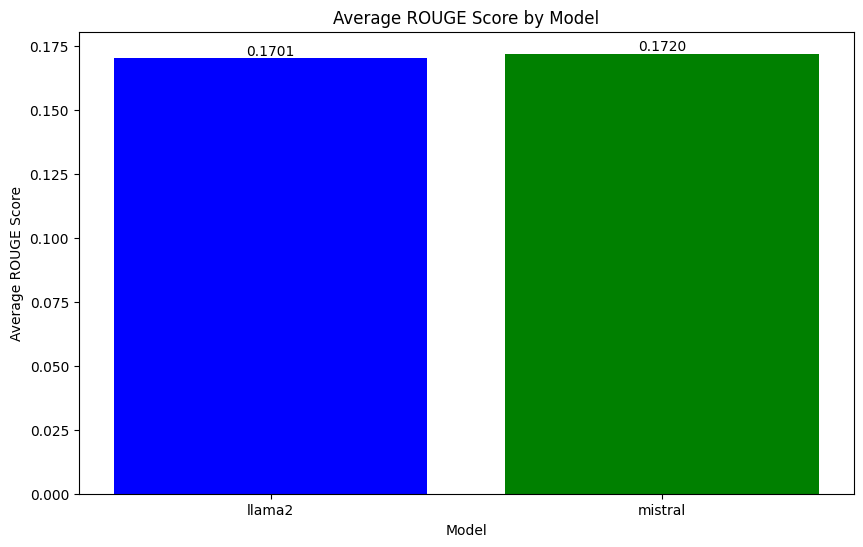

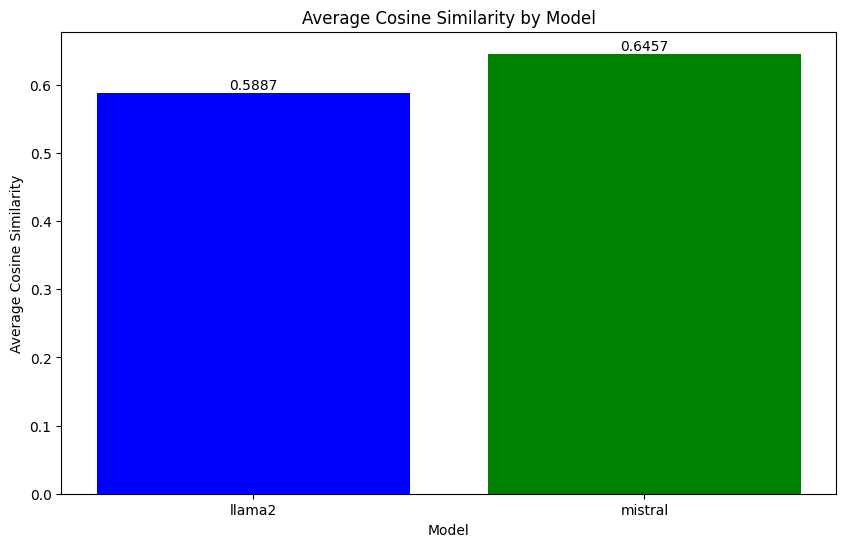

In [105]:
GPT4_reference = SummaryOppenheimerQA["Reference Answer"][0]

import time
from llama_index.llms.ollama import Ollama
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

responses = {}
metrics3C = {}

experiments = [
    {'experiment_number': 1, 'model_choice': 'llama2', 'question': SummaryOppenheimerQA['Question'][0]},
    {'experiment_number': 1, 'model_choice': 'mistral', 'question':SummaryOppenheimerQA['Question'][0]},
]

print(f"The question: {experiments[0]['question']}\n")

for experiment in experiments:
    llm = Ollama(model=experiment['model_choice'], request_timeout=50.0)
    start_time = time.time()
    response = llm.complete(experiment['question'],
                            temperature=0.00001,  
                            seed=42)
    end_time = time.time()

    response_key = f"Response_experiment{experiment['experiment_number']}_{experiment['model_choice']}"
    responses[response_key] = response.text

reference_responses = [GPT4_reference]

for key, llm_response in responses.items():
    metrics3C[key] = {}
    bleu_score = sentence_bleu([ref.split() for ref in reference_responses], llm_response.split())
    metrics3C[key]['BLEU Score'] = bleu_score
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(reference_responses[0], llm_response)
    metrics3C[key]['ROUGE Scores'] = rouge_score
    ter_score = corpus_ter([llm_response], [[ref] for ref in reference_responses]).score
    metrics3C[key]['TER Score'] = ter_score
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response] + reference_responses)
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics3C[key]['Cosine Similarities'] = cosine_similarities.flatten()
    
    print(f"Metrics for {key}:")
    print(f"BLEU Score: {bleu_score}")
    print(f"ROUGE Scores: {rouge_score}")
    print(f"TER Score: {ter_score}")
    print(f"Cosine Similarities: {cosine_similarities.flatten()}\n")

visualization_data = {
    'BLEU Score': {},
    'TER Score': {},
    'Average ROUGE Score': {},
    'Average Cosine Similarity': {}
}

for key, values in metrics3C.items():
    model_name = key.split('_')[-1]
    visualization_data['BLEU Score'][model_name] = values['BLEU Score']
    visualization_data['TER Score'][model_name] = values['TER Score']
    average_rouge_score = np.mean([score.fmeasure for score in values['ROUGE Scores'].values()])
    visualization_data['Average ROUGE Score'][model_name] = average_rouge_score
    average_cosine_similarity = np.mean(values['Cosine Similarities'])
    visualization_data['Average Cosine Similarity'][model_name] = average_cosine_similarity

def plot_results(metric_name, results_dict, ascending=True):
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1], reverse=not ascending)
    models = [x[0] for x in sorted_results]
    scores = [x[1] for x in sorted_results]
    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=['blue', 'green'])
    plt.title(f'{metric_name} by Model')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(models)
    for i, score in enumerate(scores):
        plt.text(i, score, f"{score:.4f}", ha = 'center', va = 'bottom')
    plt.show()

# Plot each metric
for metric_name, results_dict in visualization_data.items():
    if metric_name == 'TER Score':
        plot_results(metric_name, results_dict, ascending=False)  # Lower TER Score is better, hence reverse sorting
    else:
        plot_results(metric_name, results_dict)


In [106]:
import time
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'SummaryBarbieQA' and 'NONRAG_Barbie_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryBarbieQA['Question'].tolist()
reference_responses = SummaryBarbieQA['Reference Answer'].tolist()
llm_responses = NONRAG_Barbie_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_NON_RAG_BARBIE_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_NON_RAG_BARBIE_MISTRAL = pd.concat(data_frames, ignore_index=True)

# Return or print the DataFrame
print(NLP_NON_RAG_BARBIE_MISTRAL)


/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

                                            Question     BLEU Score   ROUGE-1  \
0  Summarize the main plot of the Barbie movie fo...   5.860687e-79  0.226190   
1  Provide a summary of Ken's character developme...   6.879922e-79  0.249221   
2  Describe the conflict and resolution encounter...   6.224092e-79  0.182278   
3  Summarize the role of the Mattel executives in...  2.384910e-155  0.142857   
4  Provide a summary of the climax of the Barbie ...   7.574782e-79  0.243728   
5  Summarize Barbie's influence on the other char...  1.866158e-155  0.142012   
6  Describe the transformation of Barbie Land thr...  9.054635e-232  0.144092   
7  Provide a summary of the film's resolution and...   8.886449e-79  0.281588   
8  Summarize the role of humor and satire in the ...   9.926930e-79  0.305556   
9  Describe how the movie addresses themes of emp...   4.567771e-79  0.141876   

    ROUGE-2   ROUGE-L   TER Score  Cosine Similarity  
0  0.029940  0.160714  329.577465           0.531103 

In [107]:
import time
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'SummaryBarbieQA' and RAG_Barbie_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryBarbieQA['Question'].tolist()
reference_responses = SummaryBarbieQA['Reference Answer'].tolist()
llm_responses = RAG_Barbie_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_RAG_BARBIE_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_RAG_BARBIE_MISTRAL = pd.concat(data_frames, ignore_index=True)

# Return or print the DataFrame
print(NLP_RAG_BARBIE_MISTRAL)


/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


                                            Question     BLEU Score   ROUGE-1  \
0  Summarize the main plot of the Barbie movie fo...   1.271740e-78  0.333333   
1  Provide a summary of Ken's character developme...  2.287216e-155  0.203008   
2  Describe the conflict and resolution encounter...   4.224186e-02  0.365854   
3  Summarize the role of the Mattel executives in...  3.810607e-155  0.303371   
4  Provide a summary of the climax of the Barbie ...   5.491068e-02  0.375000   
5  Summarize Barbie's influence on the other char...  2.112901e-155  0.206107   
6  Describe the transformation of Barbie Land thr...  2.220570e-155  0.163090   
7  Provide a summary of the film's resolution and...   1.370187e-78  0.306931   
8  Summarize the role of humor and satire in the ...  3.749375e-155  0.304094   
9  Describe how the movie addresses themes of emp...   1.234124e-78  0.404762   

    ROUGE-2   ROUGE-L   TER Score  Cosine Similarity  
0  0.067416  0.200000  128.169014           0.458366 

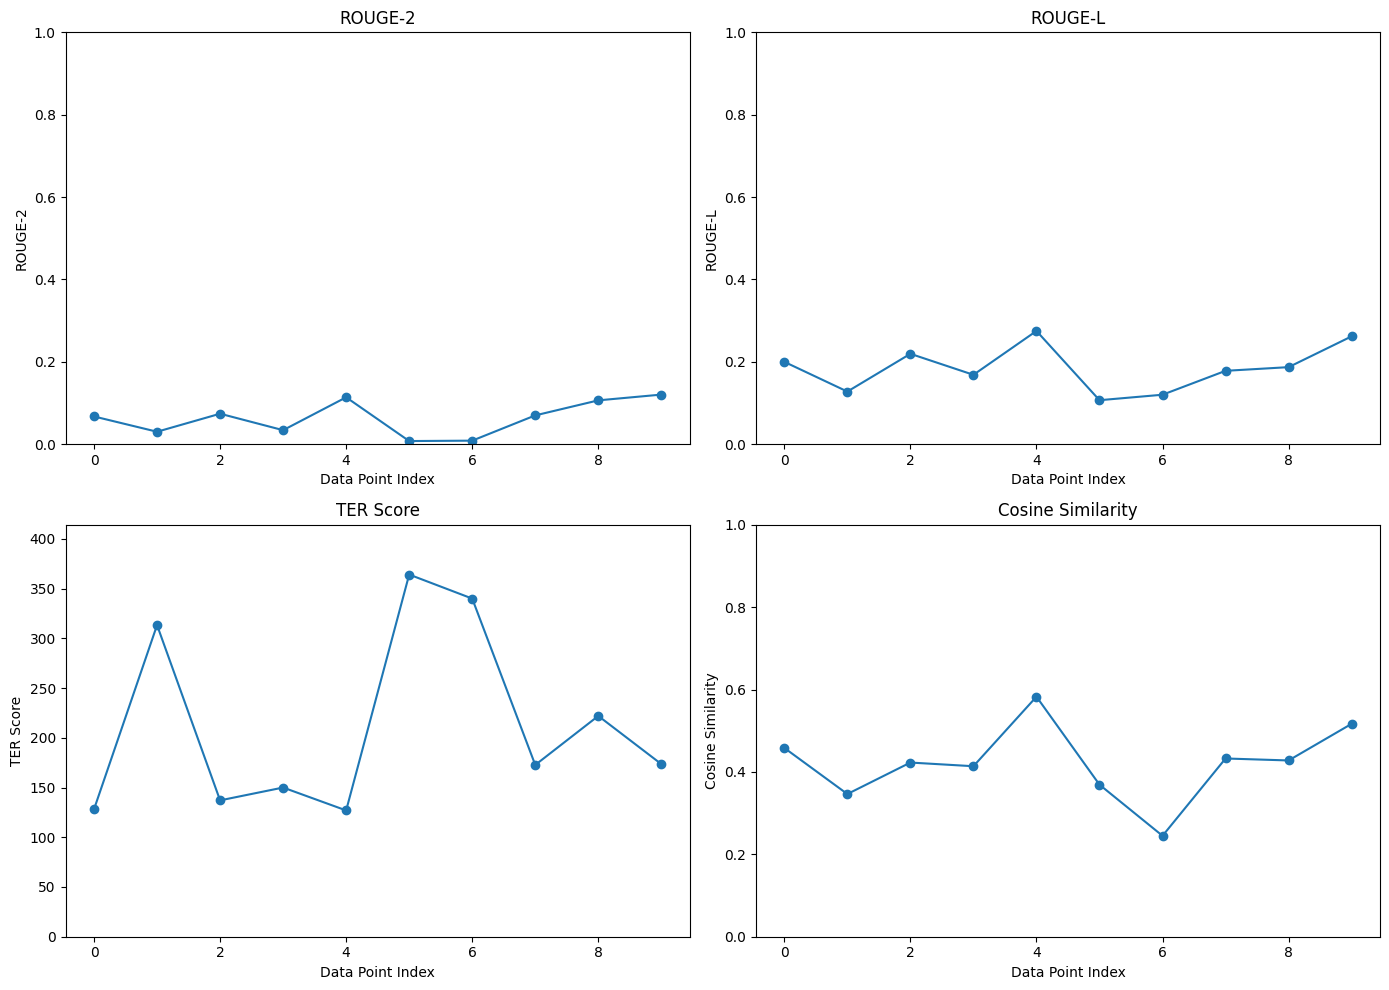

In [108]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_RAG_BARBIE_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_BARBIE_MISTRAL[metric], marker='o', linestyle='-')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

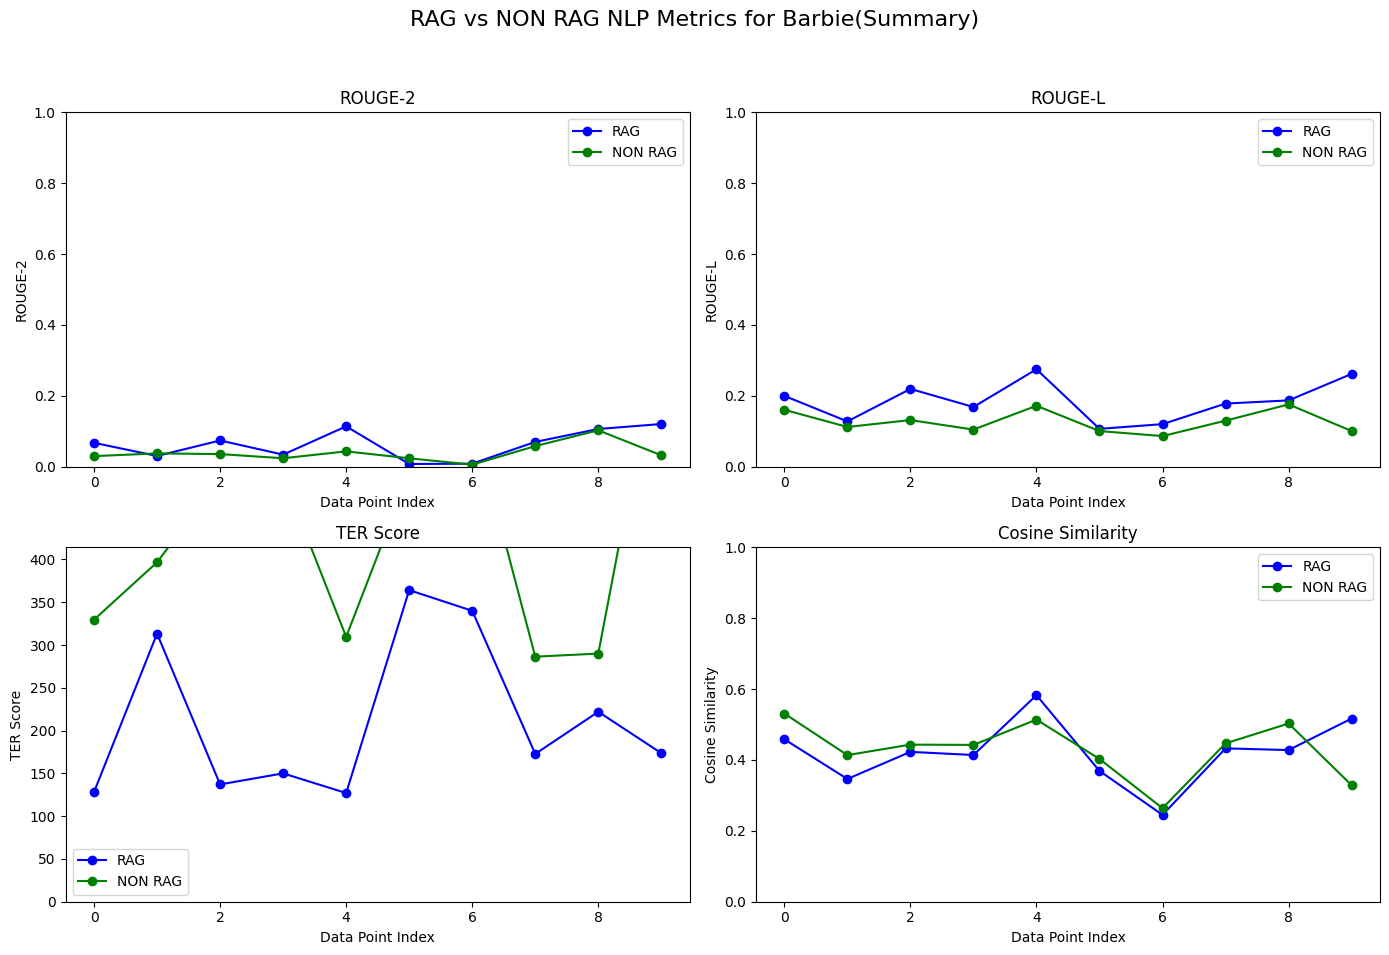

In [109]:
import matplotlib.pyplot as plt
# Define the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_RAG_BARBIE_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric for both DataFrames
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_BARBIE_MISTRAL[metric], marker='o', linestyle='-', color='blue', label='RAG')
    ax.plot(NLP_NON_RAG_BARBIE_MISTRAL[metric], marker='o', linestyle='-', color='green', label='NON RAG')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)
    ax.legend()

plt.suptitle('RAG vs NON RAG NLP Metrics for Barbie(Summary)', fontsize=16)  # Master title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the master title
plt.show()


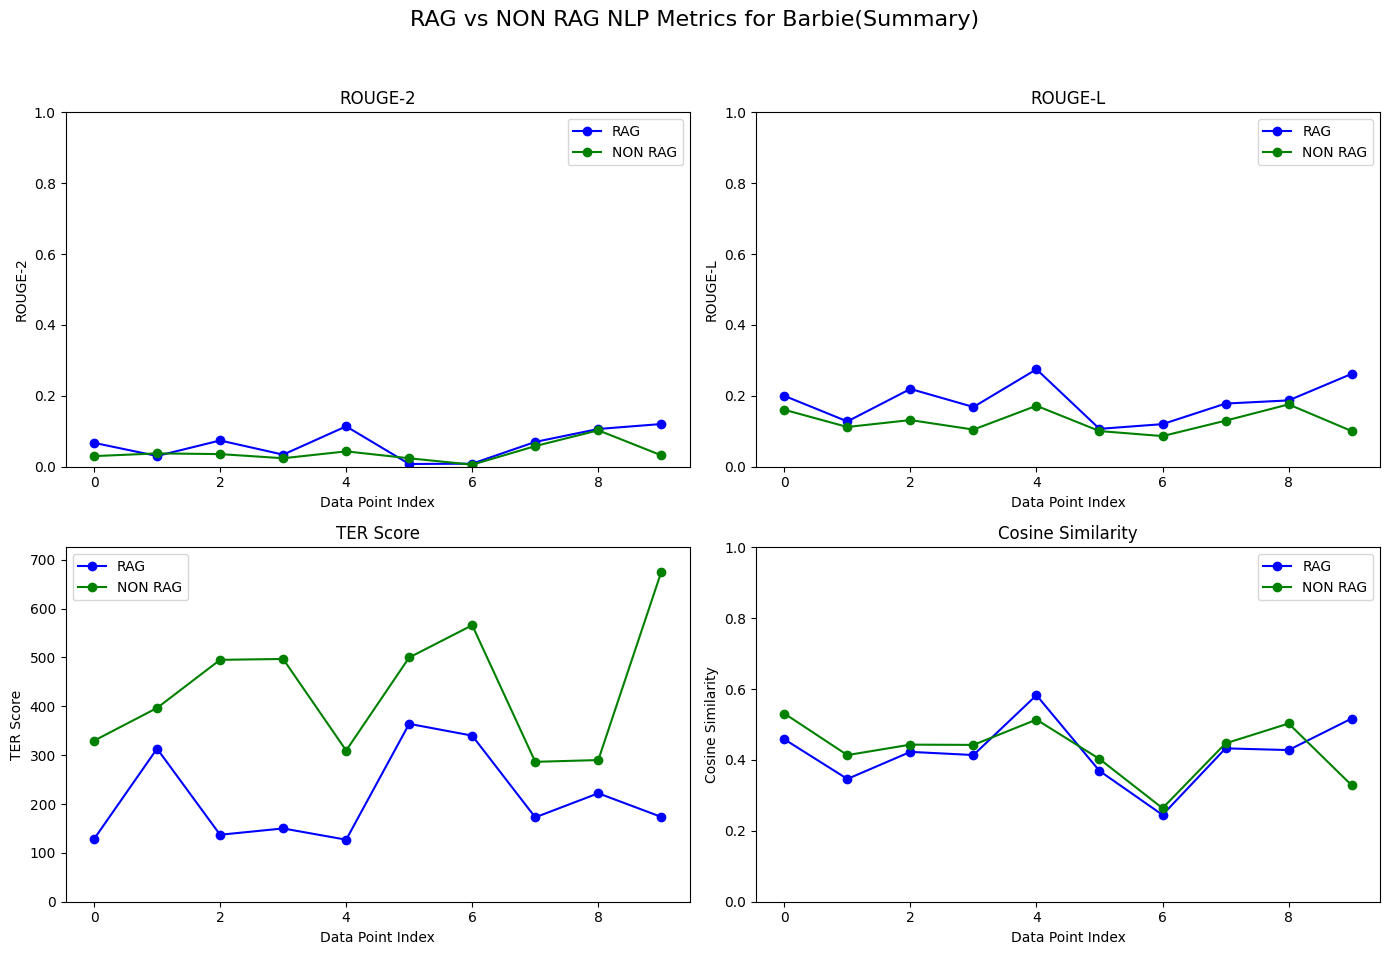

In [110]:
import matplotlib.pyplot as plt
import os

# Ensure the directory exists
os.makedirs('EvaluationFigs', exist_ok=True)

# Define the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_NON_RAG_BARBIE_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric for both DataFrames
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_BARBIE_MISTRAL[metric], marker='o', linestyle='-', color='blue', label='RAG')
    ax.plot(NLP_NON_RAG_BARBIE_MISTRAL[metric], marker='o', linestyle='-', color='green', label='NON RAG')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)
    ax.legend()

# Master title and layout adjustments
master_title = 'RAG vs NON RAG NLP Metrics for Barbie(Summary)'
plt.suptitle(master_title, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Filename based on master title with spaces replaced by underscores
filename = master_title.replace(' ', '_') + '.png'
filepath = os.path.join('EvaluationFigs', filename)

# Save the figure
plt.savefig(filepath)
plt.show()


### NLP Oppenheimer Summary 

In [111]:
import time
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'SummaryOppenheimerQA' and 'NONRAG_Oppenheimer_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryOppenheimerQA['Question'].tolist()
reference_responses = SummaryOppenheimerQA['Reference Answer'].tolist()
llm_responses = NONRAG_Oppenheimer_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_NON_RAG_Oppenheimer_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_NON_RAG_Oppenheimer_MISTRAL = pd.concat(data_frames, ignore_index=True)

# Assume 'SummaryOppenheimerQA' and RAG_Oppenheimer_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryOppenheimerQA['Question'].tolist()
reference_responses = SummaryOppenheimerQA['Reference Answer'].tolist()
llm_responses = RAG_Oppenheimer_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_RAG_Oppenheimer_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_RAG_Oppenheimer_MISTRAL = pd.concat(data_frames, ignore_index=True)


/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/homebrew/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

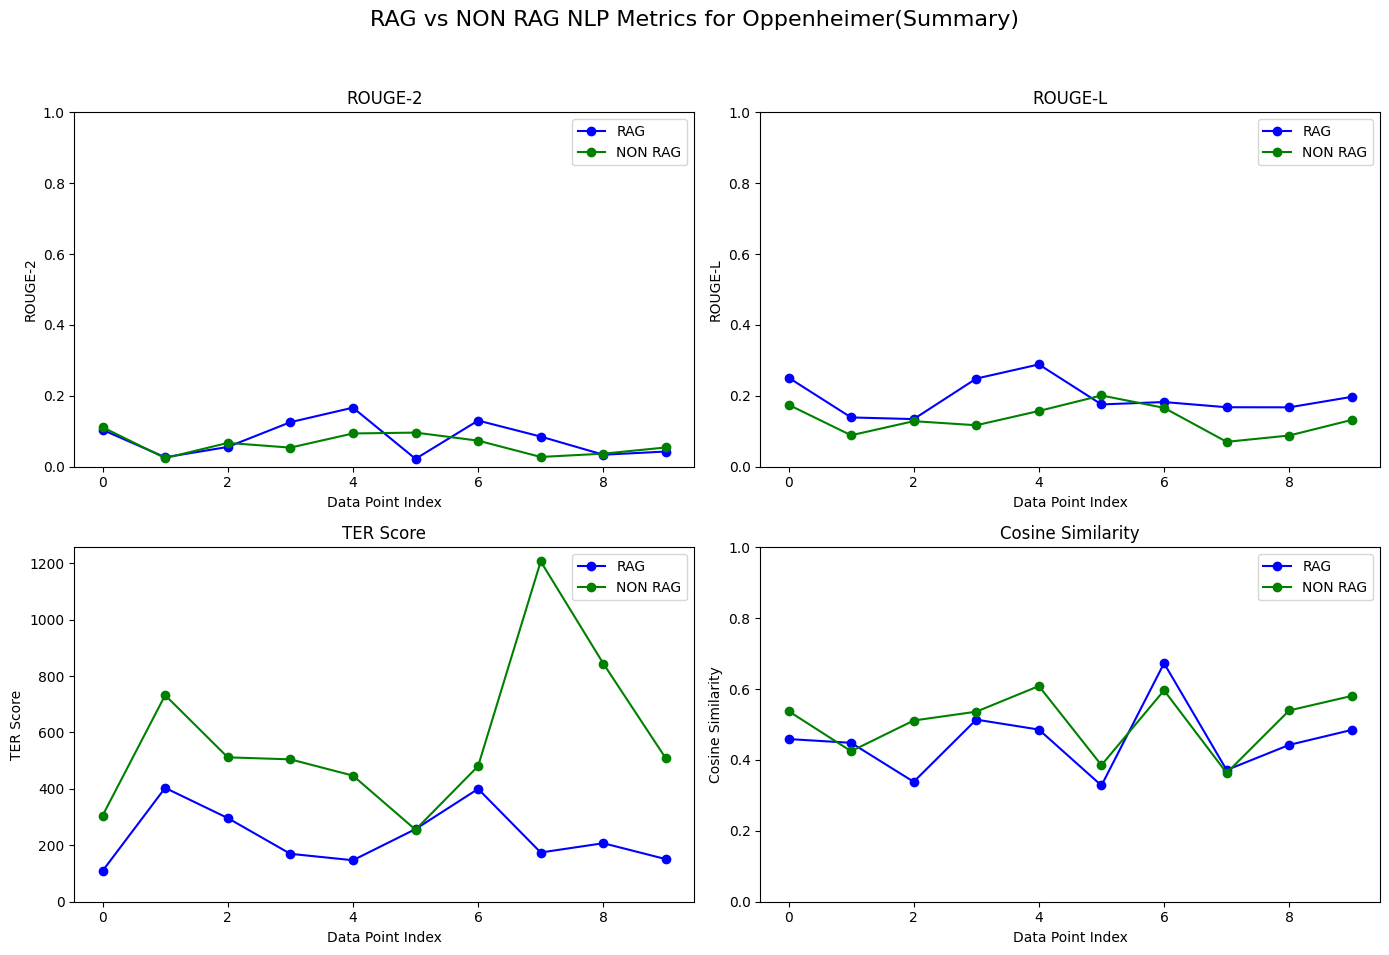

In [112]:
import matplotlib.pyplot as plt
import os

# Ensure the directory exists
os.makedirs('EvaluationFigs', exist_ok=True)

# Define the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_NON_RAG_Oppenheimer_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric for both DataFrames
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_Oppenheimer_MISTRAL[metric], marker='o', linestyle='-', color='blue', label='RAG')
    ax.plot(NLP_NON_RAG_Oppenheimer_MISTRAL[metric], marker='o', linestyle='-', color='green', label='NON RAG')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)
    ax.legend()

# Master title and layout adjustments
master_title = 'RAG vs NON RAG NLP Metrics for Oppenheimer(Summary)'
plt.suptitle(master_title, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Filename based on master title with spaces replaced by underscores
filename = master_title.replace(' ', '_') + '.png'
filepath = os.path.join('EvaluationFigs', filename)

# Save the figure
plt.savefig(filepath)
plt.show()


In [113]:
# NLP Metrics Battles 

In [114]:
import time
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'SummaryHastings' and 'NONRAG_Hastings_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryHastings['Question'].tolist()
reference_responses = SummaryHastings['Reference Answer'].tolist()
llm_responses = NONRAG_Hastings_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_NON_RAG_Hastings_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_NON_RAG_Hastings_MISTRAL = pd.concat(data_frames, ignore_index=True)

# Assume 'SummaryHastings' and RAG_Hastings_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryHastings['Question'].tolist()
reference_responses = SummaryHastings['Reference Answer'].tolist()
llm_responses = RAG_Hastings_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_RAG_Hastings_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_RAG_Hastings_MISTRAL = pd.concat(data_frames, ignore_index=True)


NameError: name 'SummaryHastings' is not defined

NameError: name 'NLP_NON_RAG_Hastings_MISTRAL' is not defined

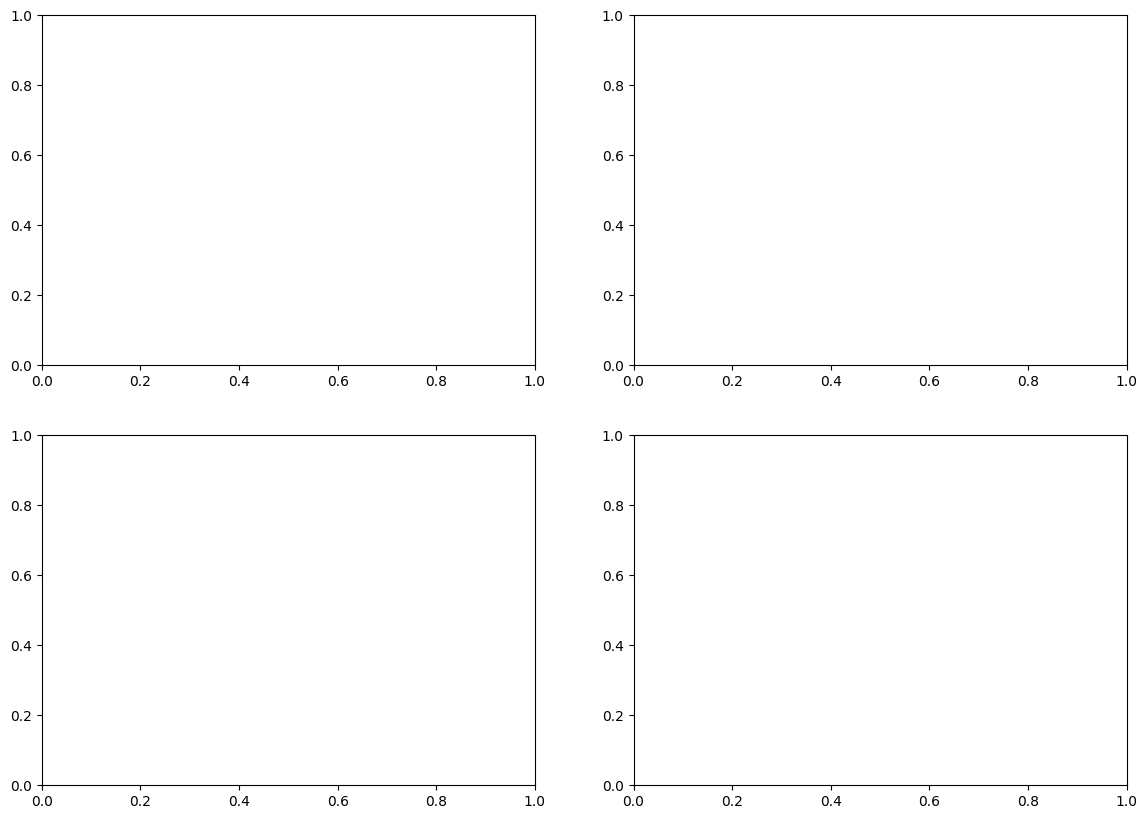

In [ ]:
import matplotlib.pyplot as plt
import os

# Ensure the directory exists
os.makedirs('EvaluationFigs', exist_ok=True)

# Define the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_NON_RAG_Hastings_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric for both DataFrames
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_Hastings_MISTRAL[metric], marker='o', linestyle='-', color='blue', label='RAG')
    ax.plot(NLP_NON_RAG_Hastings_MISTRAL[metric], marker='o', linestyle='-', color='green', label='NON RAG')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)
    ax.legend()

# Master title and layout adjustments
master_title = 'RAG vs NON RAG NLP Metrics for Hastings(Summary)'
plt.suptitle(master_title, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Filename based on master title with spaces replaced by underscores
filename = master_title.replace(' ', '_') + '.png'
filepath = os.path.join('EvaluationFigs', filename)

# Save the figure
plt.savefig(filepath)
plt.show()


In [ ]:
import time
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'SummaryWaterloo' and 'NONRAG_Waterloo_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryWaterloo['Question'].tolist()
reference_responses = SummaryWaterloo['Reference Answer'].tolist()
llm_responses = NONRAG_Waterloo_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_NON_RAG_Waterloo_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_NON_RAG_Waterloo_MISTRAL = pd.concat(data_frames, ignore_index=True)

# Assume 'SummaryWaterloo' and RAG_Waterloo_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryWaterloo['Question'].tolist()
reference_responses = SummaryWaterloo['Reference Answer'].tolist()
llm_responses = RAG_Waterloo_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_RAG_Waterloo_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_RAG_Waterloo_MISTRAL = pd.concat(data_frames, ignore_index=True)

import matplotlib.pyplot as plt
import os

# Ensure the directory exists
os.makedirs('EvaluationFigs', exist_ok=True)

# Define the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_NON_RAG_Waterloo_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric for both DataFrames
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_Waterloo_MISTRAL[metric], marker='o', linestyle='-', color='blue', label='RAG')
    ax.plot(NLP_NON_RAG_Waterloo_MISTRAL[metric], marker='o', linestyle='-', color='green', label='NON RAG')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)
    ax.legend()

# Master title and layout adjustments
master_title = 'RAG vs NON RAG NLP Metrics for Waterloo(Summary)'
plt.suptitle(master_title, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Filename based on master title with spaces replaced by underscores
filename = master_title.replace(' ', '_') + '.png'
filepath = os.path.join('EvaluationFigs', filename)

# Save the figure
plt.savefig(filepath)
plt.show()



NameError: name 'SummaryWaterloo' is not defined

In [ ]:
import time
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sacrebleu import corpus_ter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assume 'SummaryBoyne' and 'NONRAG_Boyne_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryBoyne['Question'].tolist()
reference_responses = SummaryBoyne['Reference Answer'].tolist()
llm_responses = NONRAG_Boyne_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_NON_RAG_Boyne_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_NON_RAG_Boyne_MISTRAL = pd.concat(data_frames, ignore_index=True)

# Assume 'SummaryBoyne' and RAG_Boyne_response_mistral' are pre-loaded DataFrames or similar structures
questions = SummaryBoyne['Question'].tolist()
reference_responses = SummaryBoyne['Reference Answer'].tolist()
llm_responses = RAG_Boyne_response_mistral  # This should be a list of responses corresponding to 'questions'

NLP_RAG_Boyne_MISTRAL = pd.DataFrame(columns=['Question', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'TER Score', 'Cosine Similarity'])

# Prepare a list to hold temporary DataFrames for concatenation
data_frames = []

for question, ref_response, llm_response in zip(questions, reference_responses, llm_responses):
    metrics = {}
    bleu_score = sentence_bleu([ref_response.split()], llm_response.split())
    metrics['BLEU Score'] = bleu_score

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(ref_response, llm_response)
    metrics['ROUGE-1'] = rouge_score['rouge1'].fmeasure
    metrics['ROUGE-2'] = rouge_score['rouge2'].fmeasure
    metrics['ROUGE-L'] = rouge_score['rougeL'].fmeasure

    ter_score = corpus_ter([llm_response], [[ref_response]]).score
    metrics['TER Score'] = ter_score

    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([llm_response, ref_response])
    cosine_similarities = cosine_similarity(tfidf[0:1], tfidf[1:])
    metrics['Cosine Similarity'] = cosine_similarities.flatten()[0]

    # Create a DataFrame for the current iteration and add it to the list
    temp_df = pd.DataFrame([{**{'Question': question}, **metrics}])
    data_frames.append(temp_df)

# Concatenate all the DataFrames in the list into the final DataFrame
NLP_RAG_Boyne_MISTRAL = pd.concat(data_frames, ignore_index=True)

import matplotlib.pyplot as plt
import os

# Ensure the directory exists
os.makedirs('EvaluationFigs', exist_ok=True)

# Define the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Set consistent axes limits based on the observed data
axes_limits = {
    'ROUGE-2': (0, 1),
    'ROUGE-L': (0, 1),
    'TER Score': (0, max(NLP_NON_RAG_Boyne_MISTRAL['TER Score']) + 50),
    'Cosine Similarity': (0, 1)
}

# Plot each metric for both DataFrames
for ax, (metric, limits) in zip(axs.flatten(), axes_limits.items()):
    ax.plot(NLP_RAG_Boyne_MISTRAL[metric], marker='o', linestyle='-', color='blue', label='RAG')
    ax.plot(NLP_NON_RAG_Boyne_MISTRAL[metric], marker='o', linestyle='-', color='green', label='NON RAG')
    ax.set_title(metric)
    ax.set_ylim(limits)  # Apply consistent y-axis limits
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel(metric)
    ax.legend()

# Master title and layout adjustments
master_title = 'RAG vs NON RAG NLP Metrics for Boyne(Summary)'
plt.suptitle(master_title, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Filename based on master title with spaces replaced by underscores
filename = master_title.replace(' ', '_') + '.png'
filepath = os.path.join('EvaluationFigs', filename)

# Save the figure
plt.savefig(filepath)
plt.show()



NameError: name 'SummaryBoyne' is not defined

In [ ]:
# Summarisation based Tasks:

In [118]:
RAG_Barbie_response_mistral[0]

' In the given context, Barbie Margot embarks on a mission with Gloria and Sasha to challenge the patriarchy within Barbie Land by freeing Barbies from the influence of their Kens. The trio uses deception and distraction to lure the Barbies away and then reprograms them to join their cause. This plan is executed through a series of heist-like scenes, where the Barbies pretend to be helpless and dependent on their Kens. Through this process, Barbie Margot gains newfound authority and deeper understanding of the power dynamics at play. The ultimate goal is to recruit the freed Barbies to their cause and bring about change in Barbie Land.'

In [117]:
NONRAG_Barbie_response_mistral[0]

' In the Barbie movie titled "Barbie: Margate\'s Dancing Star," Barbie Margate is a charming and ambitious young doll from the glamorous fashion capital of Barbieland. She dreams of becoming a world-class ballerina, but her perfect pink shoes are made for dancing in the fashion shows, not ballet stages. Despite this setback, Barbie decides to follow her passion and embarks on a journey beyond Barbieland\'s borders to the human world.\n\nIn the human world, she discovers an old theater that is run down but has the potential to be turned into a beautiful ballet studio. With the help of a kind-hearted human boy named Ken, Barbie works tirelessly to restore the theater and auditions for the local ballet company. Though initially rejected due to her unconventional background, she refuses to give up and continues to train and practice in secret.\n\nWhen the lead ballerina is injured, the company\'s director, Mr. Sprinkles, reconsiders Barbie\'s audition tape and offers her a chance to perfor

In [123]:
SummaryBarbieQA['RAG_response']= RAG_Barbie_response_mistral
SummaryBarbieQA['NONRAG_response']= NONRAG_Barbie_response_mistral

,Question,Reference Answer
0,Summarize the main plot of the Barbie movie fo...,"In the Barbie movie, Barbie Margot experiences..."
1,Provide a summary of Ken's character developme...,"Throughout the Barbie movie, Ken undergoes sig..."
2,Describe the conflict and resolution encounter...,Barbie Margot faces a major conflict when she ...
3,Summarize the role of the Mattel executives in...,The Mattel executives in the Barbie movie play...
4,Provide a summary of the climax of the Barbie ...,The climax of the Barbie movie occurs when Bar...
5,Summarize Barbie's influence on the other char...,"In the movie, Barbie serves as a catalyst for ..."
6,Describe the transformation of Barbie Land thr...,Barbie Land undergoes significant transformati...
7,Provide a summary of the film's resolution and...,The resolution of the Barbie movie underscores...
8,Summarize the role of humor and satire in the ...,Humor and satire are pivotal in the Barbie mov...
9,Describe how the movie addresses themes of emp...,The movie tackles empowerment and self-discove...
